In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

from scipy.stats import ttest_1samp, ttest_ind
from scipy import stats
from statsmodels.stats import weightstats as stests

from functools import wraps
import time

In [3]:
plt.style.use('seaborn')

In [4]:
%run CoreFunction.ipynb

In [5]:
TEST_SIZE=0.15
n_comp = 0.95

In [6]:
scaler_min_max = MinMaxScaler()
scaler_z_score = StandardScaler()

In [ ]:
# https://linuxhint.com/add-table-contents-jupyter-notebook/

# Electricity Price Forecast 

## Multi-output Base Models

### Read Price and Normalize Data

In [7]:
price_target, price_attribute, df_data_price = read_data("price actual", r"data\df_data_price_ts720_120_24.csv")

In [8]:
price_atribute_train, price_atribute_test, price_target_train, price_target_test, price_attribute_col_names = scaled_data(price_target, price_attribute, TEST_SIZE, scaler_z_score)

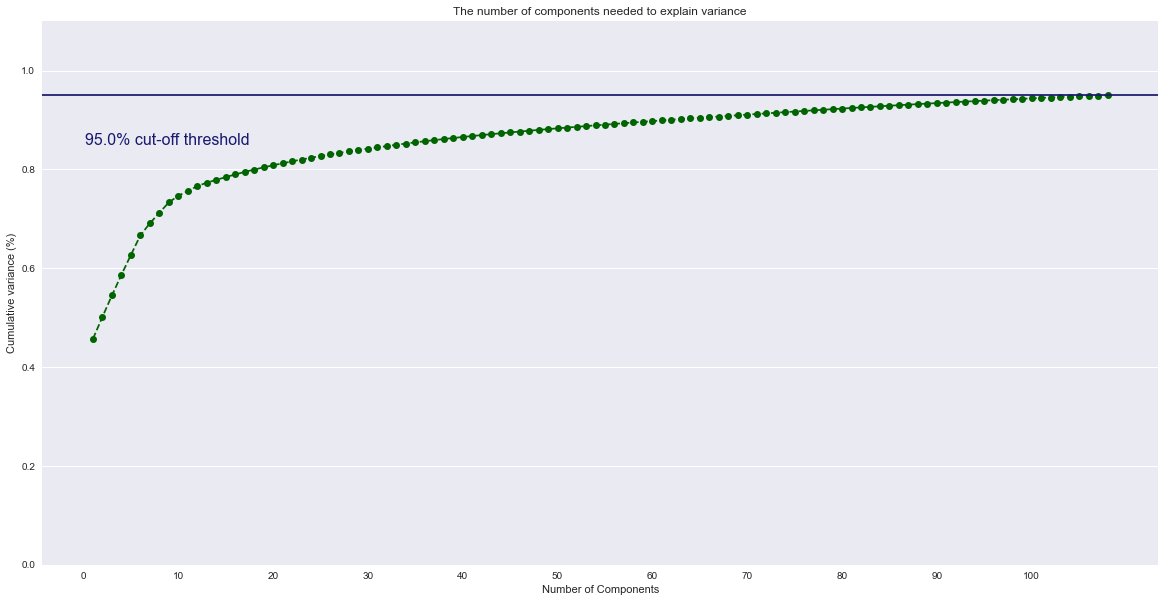

Transformed train shape: (29071, 108)
Transformed test shape: (5131, 108)
Function took 2.9845 seconds


In [9]:
most_important_features, PC_train, PC_test = PCA_feature_preprocessing(price_atribute_train, price_atribute_test, n_comp = n_comp, col_names = price_attribute.columns)

In [10]:
df_data_price.shape, price_target.shape, price_attribute.shape

((34202, 923), (34202, 120), (34202, 801))

In [11]:
price_atribute_train.shape, price_target_train.shape, price_atribute_test.shape, price_target_test.shape

((29071, 801), (29071, 120), (5131, 801), (5131, 120))

In [12]:
price_atribute_train.mean(), price_atribute_train.std()

(0.0003693659564305325, 1.0020012792625042)

In [13]:
price_atribute_train.min(), price_atribute_train.max()
# pd.DataFrame(price_atribute_train).describe().T

(-13.336127913386292, 184.935123759658)

Линейната регресия е лесен и популярен подход при контролираното машинно обучение.
Може да бъде единична или множествена в зависимост от броя на независимите променливи. В зависимост от прогнозираният изход, може да бъде едноизходна и многоизходна.

В най-базовия случай линейна регресия дава възможност да анализираме влиянието на две или повече независими случайни променливи върху една зависима променлива:

$$y=β_0​+β_1​x_1​+β_2​x_2​+⋯+β_p​x_p​+ε$$

$β_1, β_2$ и т.н. се наричат регресионни коефициенти и показват връзката между y и $x_i$. 

Регресията с множество изходи e регресионен проблем, които включва прогнозиране на две или повече променливи, отопределен входен набор независимите променливи. Основно има два подхода при решаване на многоизходни регрисионни проблеми:

- __Директен мултиизход__ : от входният набор се прогнозира независимо всеки изход.
- __Верижен мултиизход__ : от входният набор се прогнозира първият изход, който служи за прогнозиране на следващият и т.н.

__Основното предположение__ на модела на линейна регресия е, че между зависимите и независимите променливи съществува  линейна връзка и независимите променливи не са свързани една с друга. <br>
__Допусканията за грешката__ на модела са:

   - Грешката на модела е нормално разпределена около средна стойност 0.
   - Хомоскедастизъм - има еднакво разсейване/вариация.
   - Няма автокорелация - остатъците в модела на линейна регресия са независимо и еднакво разпределени.
 
Голямото __предимство__ на линейната регресия се обуславя от факта, че предоставят лесно тълкуване на моделите, което е важно за академичните и надзорните структури. 

Основният __недостатък__ на линейно регрисионните модели е основното им допускане, че зависимостта между независимите и зависимите променливи е линейна. Въпреки това те са много добра отправна точка за моделиране.

Ще ползваме базовата линейна регресия като бенчмарк за нашите модели. Първоначално ще изградим линеен реграсионен модел върху всички данни.

### Multi-Output Linear Regression

In [1]:
# Kaggle Results - това е резултата спрямо подадените в сета данни за прогнозната цена - колона 'price day ahead':
# Mean squared error: 175.56
# Root mean squared error: 13.25
# mean_absolute_error: 10.49
# Coefficient of determination: 0.1298
# Predicted price mean: 49.874 (14.619)
# Actual mean: 57.884 (14.204)

LinearRegression() на sklearn поддържа вграден Multi-Output изход базиран на директният подход.
LinearRegression() дава относително стабилни резултати, като се представя почти еднакво на тренировъчните и тестовите данни. Крос валидацията изглежда стабилна. 

In [14]:
_, _, _,_ = cv_score(LinearRegression(), price_atribute_train, price_target_train)

Cross validated Mean Squared Error: 53.122 (1.227)
Cross validated Root Mean Squared Error: 7.280 (0.084)
Cross validated Mean Absolute Error: 5.347 (0.053)
Cross validated Coefficient of Determination: 0.735 (0.007)
Function took 299.4539 seconds


In [63]:
price_linear_regression = LinearRegression().fit(price_atribute_train, price_target_train)

In [16]:
save_model(price_linear_regression, "#price_linear_regression.sav")

In [17]:
price_linear_regression = load_model("#price_linear_regression.sav")

In [18]:
price_prediction = price_linear_regression.predict(price_atribute_test)

In [19]:
price_lr_mse_train, price_lr_mae_train, price_lr_r2_train = evaluation_report(price_linear_regression, price_atribute_train, price_target_train)

Score Results:
Mean squared error: 49.43
Root mean squared error: 7.02
Mean absolute error: 5.17
Coefficient of determination: 0.7532
Predicted mean: 57.731 (12.280)


In [20]:
price_lr_mse_test, price_lr_mae_test, price_lr_r2_test = evaluation_report(price_linear_regression, price_atribute_test, price_target_test)

Score Results:
Mean squared error: 52.28
Root mean squared error: 7.23
Mean absolute error: 5.32
Coefficient of determination: 0.7311
Predicted mean: 57.680 (12.171)


Посочените показатели за изчисляване на грешката по-горе са средни от оценките за всички 120 регресии. На пръв поглед оценките върху тренировъчните и тестовите данни са близки и изглежда, че модела генерализира добре. Но тъй като работим с разпределения, обаче ще проверим с тестове на хипотези, дали между средните стойности на двете оценки има статистически значима разлика.

Както е видно по-долу от графиките и тестовете, твърдението, че двете оценки са близки не може да бъде прието.

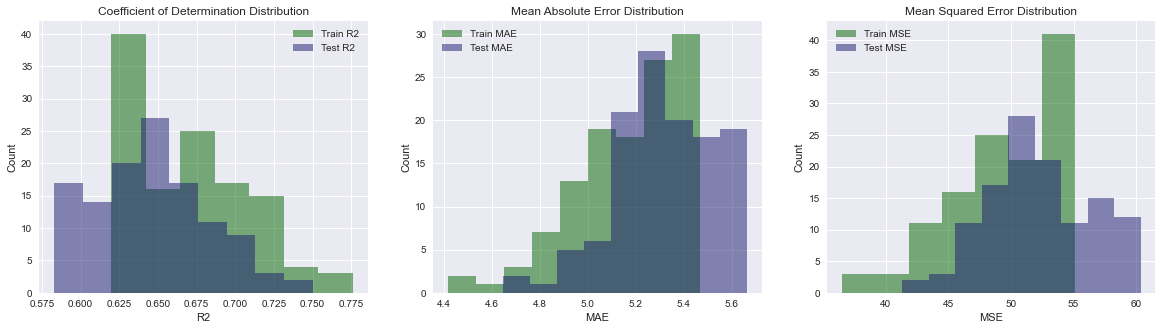

In [21]:
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = generate_score_distributions(price_linear_regression, price_atribute_train, price_target_train, price_atribute_test, price_target_test)


Тестваме дали между извадките за посочените три вида оценители има статистическа значима разлика. Двата типа тестове имат следните хипотези:<br>

__Two Sample z-test__ uses the following null and alternative hypotheses:<br>
- $H_0$: μ1 = μ2 (the two population means are equal)<br>
- $H_A$: μ1 ≠ μ2 (the two population means are not equal)<br>

__Two Sample t-test__ uses the following null and alternative hypotheses:<br>
- $H_0$: µ1 = µ2 (the two population means are equal)<br>
- $H_A$: µ1 ≠µ2 (the two population means are not equal)<br>

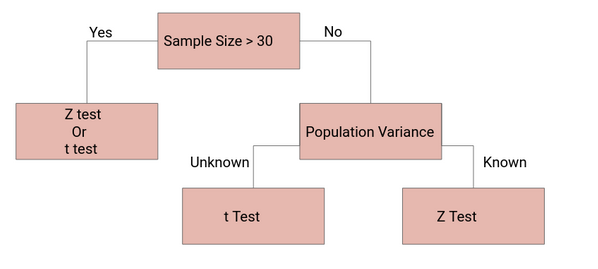

In [21]:
pv_r2_ttest = get_ttest_2samples(r2_train, r2_test)
pv_mae_ttest = get_ttest_2samples(mae_train, mae_test)
pv_mse_ttest = get_ttest_2samples(mse_train, mse_test)

p-value: 4.0557049354964623e-07
we are rejecting null hypothesis
p-value: 2.470788913635329e-07
we are rejecting null hypothesis
p-value: 3.925932757407768e-07
we are rejecting null hypothesis


In [22]:
pv_r2_ztest = get_ztest_2samples(r2_train, r2_test)
pv_mae_ztest = get_ztest_2samples(mae_train, mae_test)
pv_mse_ztest = get_ztest_2samples(mse_train, mse_test)

p-value: 1.8705631409343237e-07
reject null hypothesis
p-value: 1.0755667018629916e-07
reject null hypothesis
p-value: 1.803977581771504e-07
reject null hypothesis


Кода по-долу визуализира някой основни характеристики на 120-те изхода на линейната регресия. Прави тест за нормалност на остатъците за избрана изходна регресия, както и визуализира съпоставка между прогнозираната и реалната цена за избрани точкови наблюдения. 
- __price_e_minus_o__ - може да избира от start_index=0 до stop_index=120 - колкото е броя на изходите/единичните регресии<br>
- __get_ttest и get_ztest__ работят с конкретен индекс от 0 до 120 - колкото е броя на изходите/единичните регресии<br>
- __plot_actual_vs_prediction__ - избира start_inx = 0 end_inx = 5131 броя на наблюденията в тестовия сет<br>
- __plot_feature_vs_residuals__ - избира start_inx = 0 end_inx = count(feature) броя на features в тестовия сет. Ако се подаде само име на feature ще извади само неговата графика.  Когато работим с пълният сет данни броя feature е в променливата price_attribute_col_names. При работа с редуцирани данни имената на колоните се генерират автоматично и са от вида "PCA_{i}". <br>

<span style="color:red"> *Тези упътвания важат за всички по-натъшни модели.<span>
    
Забелязва се определена нестабилност при прогнозирането на по-ниските цени. Тестовете показват, че не може да се отхвърли предположението, че Residuals имат нормално разпределение. 
    
Разпределението на residuals е леко ляво изтеглено. Графиките показват, че модела се справя по-зле с ниските цени. По отношение на високите актуални цени се справя по-добре.

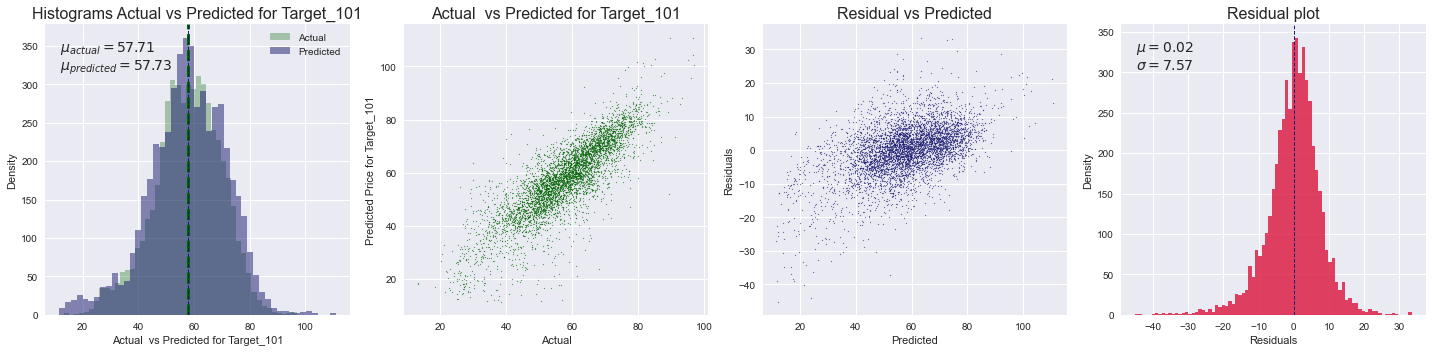

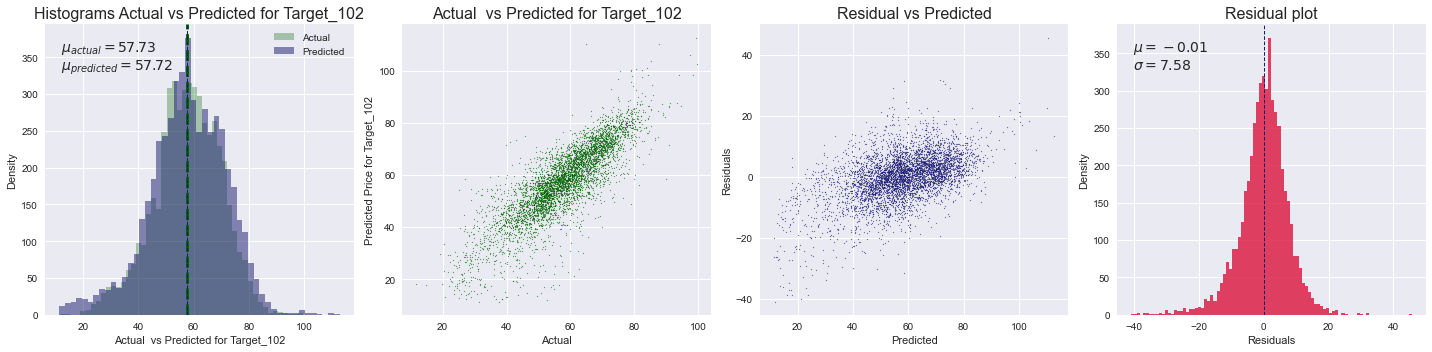

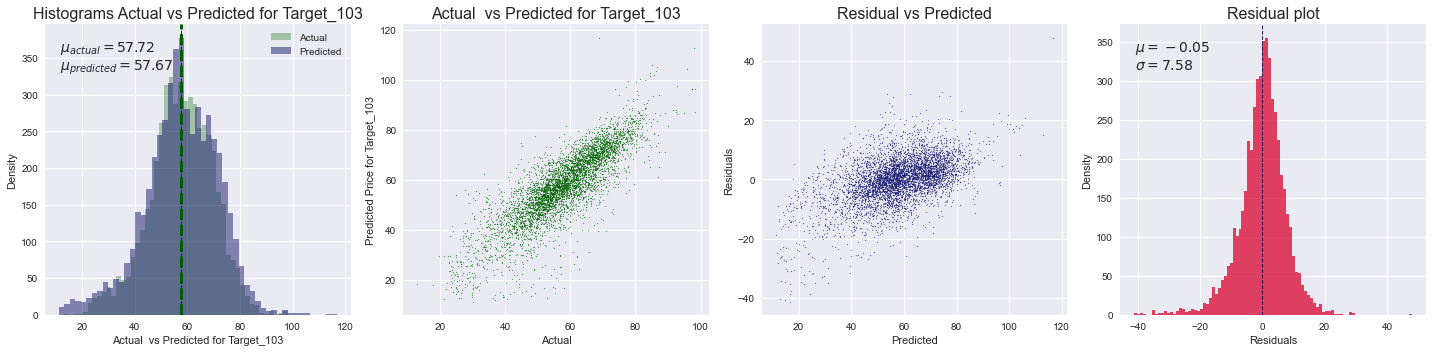

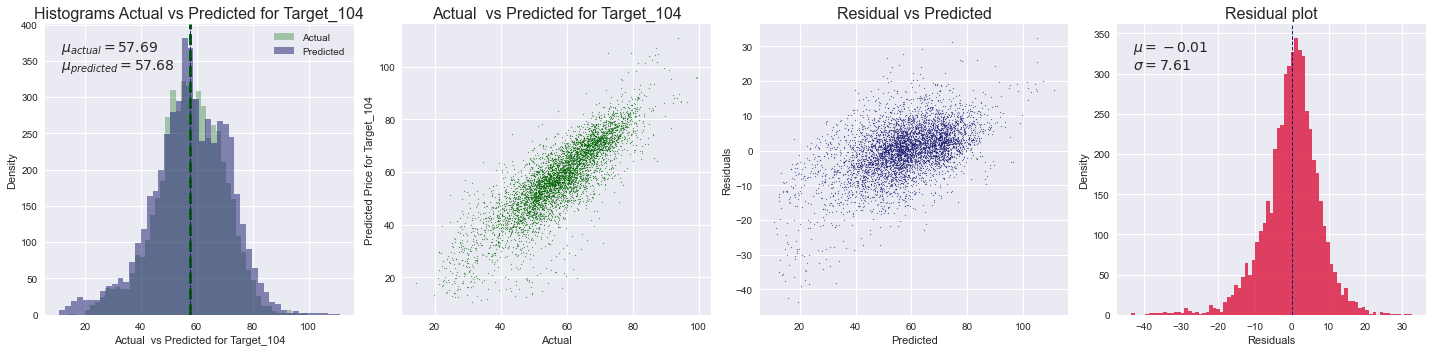

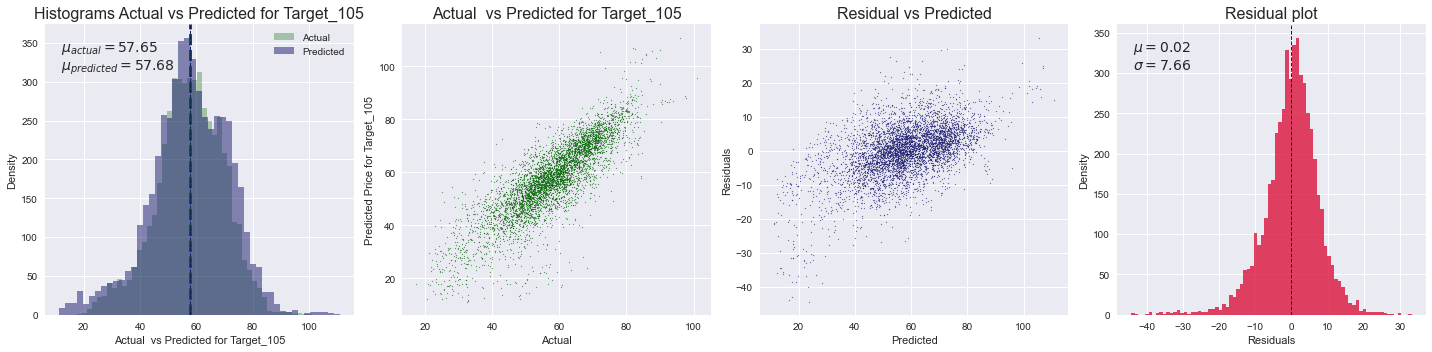

In [23]:
price_prediction = price_linear_regression.predict(price_atribute_test)
price_e_minus_o = get_and_plot_data(price_prediction, price_target_test, start_index=100, stop_index=105)
# beteen 0 and 120 ----> count of targets

In [24]:
print(get_ttest (price_prediction, price_target_test, idx=101))

p-value: 0.9488913133741679
we are accepting null hypothesis


In [25]:
print(get_ztest (price_prediction, price_target_test, idx=101))

p-value: 0.948888815825613
accept null hypothesis


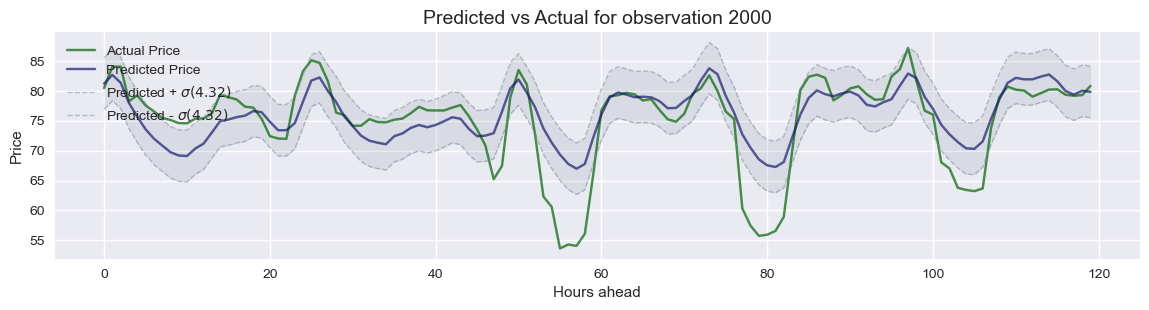

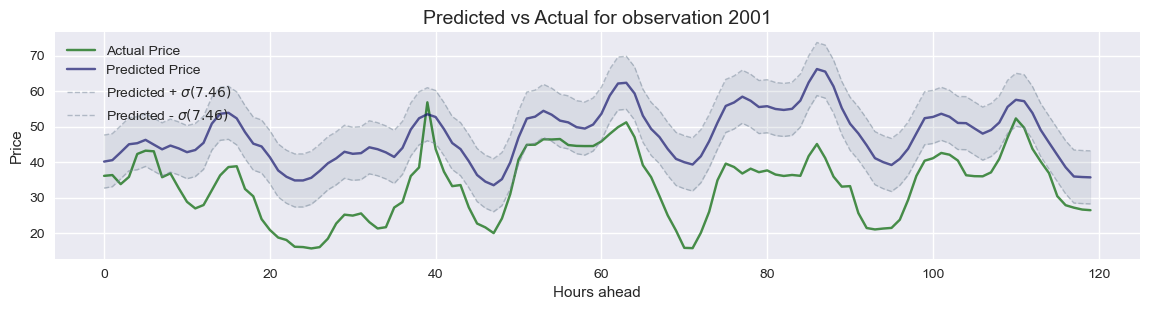

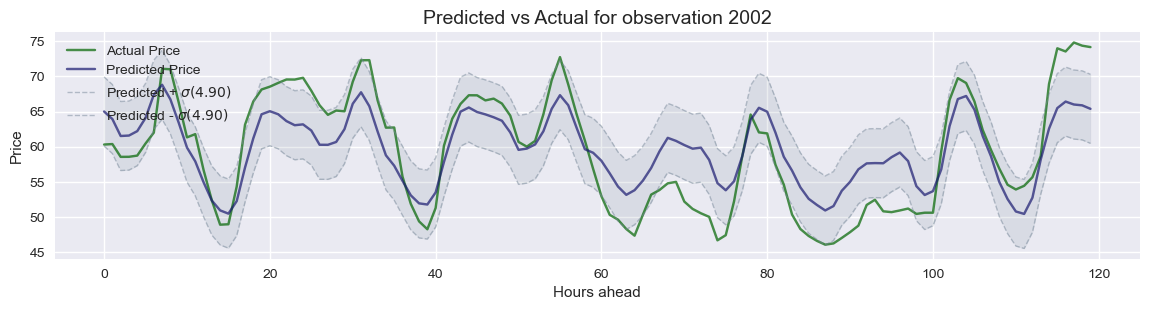

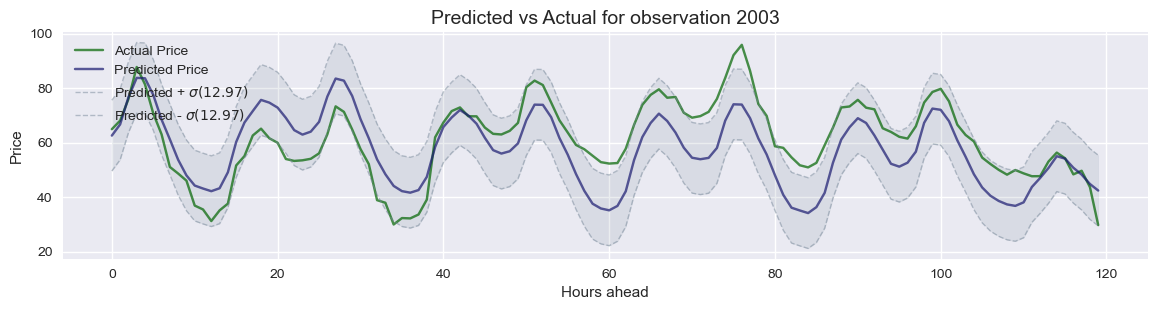

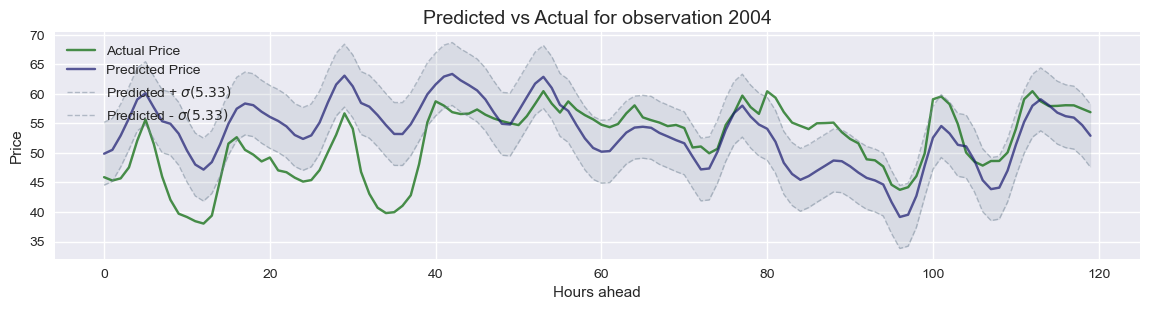

In [26]:
plot_actual_vs_prediction(price_prediction, price_target_test, variable_name = 'Price', start_inx = 2000, end_inx = 2005)
# beteen 0 and 5131 ----> count of observations in test_dataset

Функцията plot_feature_vs_residuals() визуализира вида на feature vs residuals:

- (start_index, stop_index) - интервала се определя от броя на features --> len(price_attribute_col_names); 
- Ако се подаде само име на feature ще извади само неговата графика.
- price_attribute_col_names.to_list() - имената на колоните, с които работи са тук. Примерно: col_name = 'total load actual'
- target_indx показва за кой изход искаме да видим разпределението - възможните стойности са в интервала [0, 119], колкото са изходите на регресията.

_TODO_ За линейната регресия могат да се вземат .coef_ да се сортират и да се изберат тези с най-голямо тегло, за да се видят по-важните.

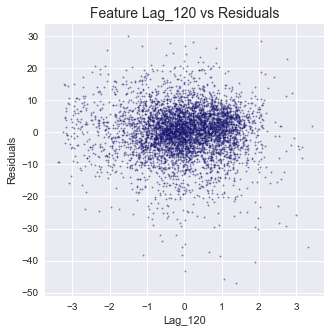

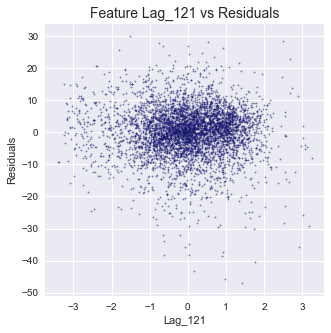

In [27]:
plot_feature_vs_residuals(price_atribute_test, price_attribute_col_names, 
                          price_prediction, price_target_test, start_index=200, stop_index=202, 
                          target_indx = 119, col_name = None) 

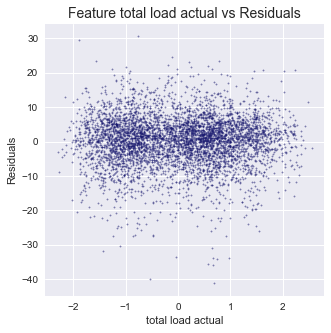

In [28]:
plot_feature_vs_residuals(price_atribute_test, price_attribute_col_names,  
                          price_prediction, price_target_test, start_index=155, stop_index=157, 
                          target_indx = 50, col_name = 'total load actual') 

Наложен върху всички данни, LinearRegression() е относително бърз. Ще пробваме доколко биха се променили резултатите при редукция на пространството с РСА. 

### Linear Regression with Reduce feature

In [29]:
price_linear_regression_pca = LinearRegression().fit(PC_train, price_target_train)

In [30]:
save_model(price_linear_regression_pca, "#price_linear_regression_pca.sav")

In [31]:
price_linear_regression_pca = load_model("#price_linear_regression_pca.sav")

In [11]:
_, _, _, _ = cv_score(LinearRegression(), PC_train, price_target_train)
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42) изглежда нестабилен този резултат  - доста разсеяни метрики.

Cross validated Mean Squared Error: 161.293 (226.513)
Cross validated Root Mean Squared Error: 9.936 (5.444)
Cross validated Mean Absolute Error: 5.431 (0.149)
Cross validated Coefficient of Determination: 0.979 (0.581)
Function took 37.4350 seconds


Крос валидацията има нестабилна оценка - доста разсеяни метрики и съмнително висок резултат за коефициента на определеност. 

In [32]:
_, _, _ = evaluation_report(price_linear_regression_pca, PC_train, price_target_train)

Score Results:
Mean squared error: 52.65
Root mean squared error: 7.25
Mean absolute error: 5.34
Coefficient of determination: 0.7371
Predicted mean: 57.731 (12.149)


In [33]:
_, _, _ = evaluation_report(price_linear_regression_pca, PC_test, price_target_test)

Score Results:
Mean squared error: 52.47
Root mean squared error: 7.24
Mean absolute error: 5.34
Coefficient of determination: 0.7302
Predicted mean: 57.692 (12.022)


In [34]:
price_prediction_pca = price_linear_regression_pca.predict(PC_test)

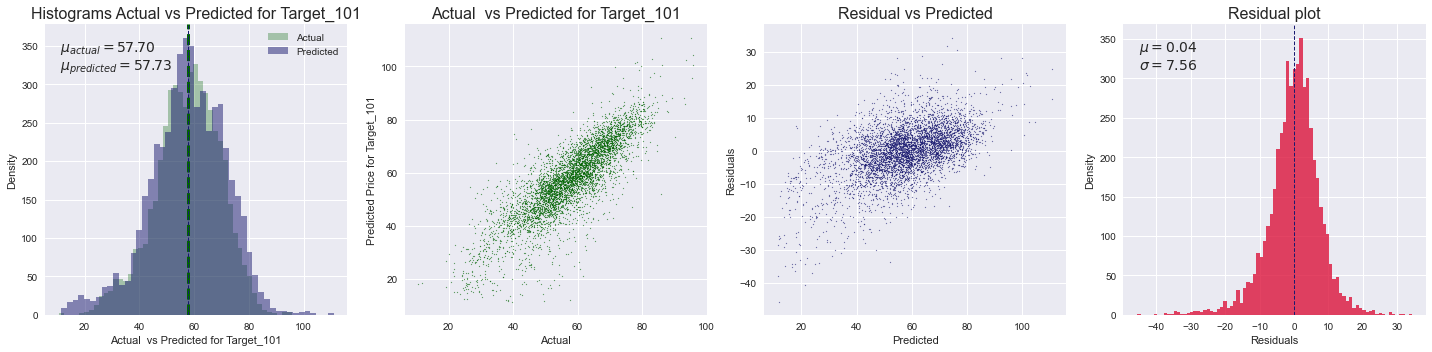

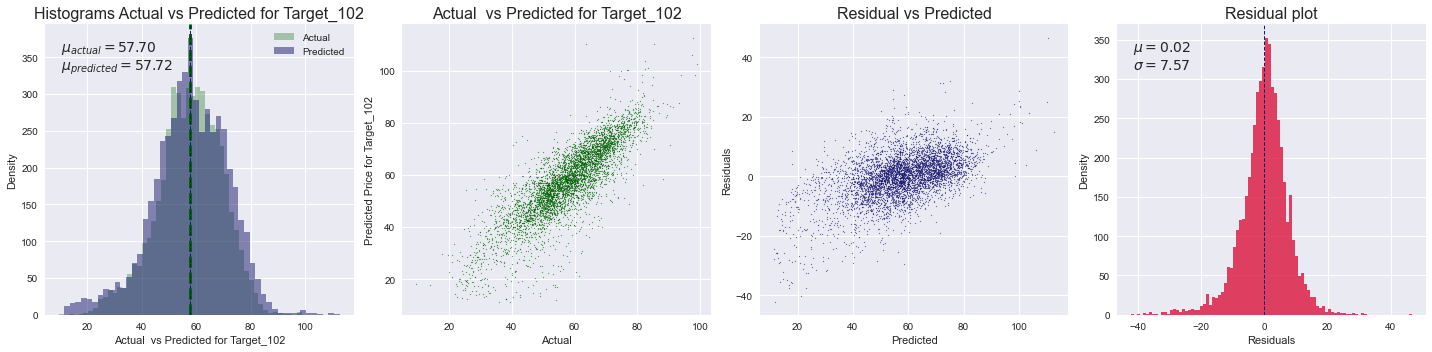

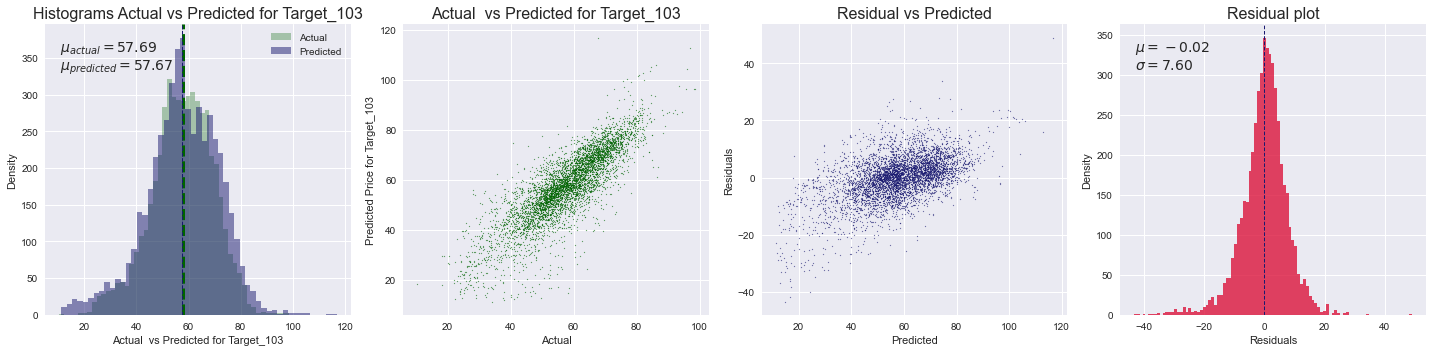

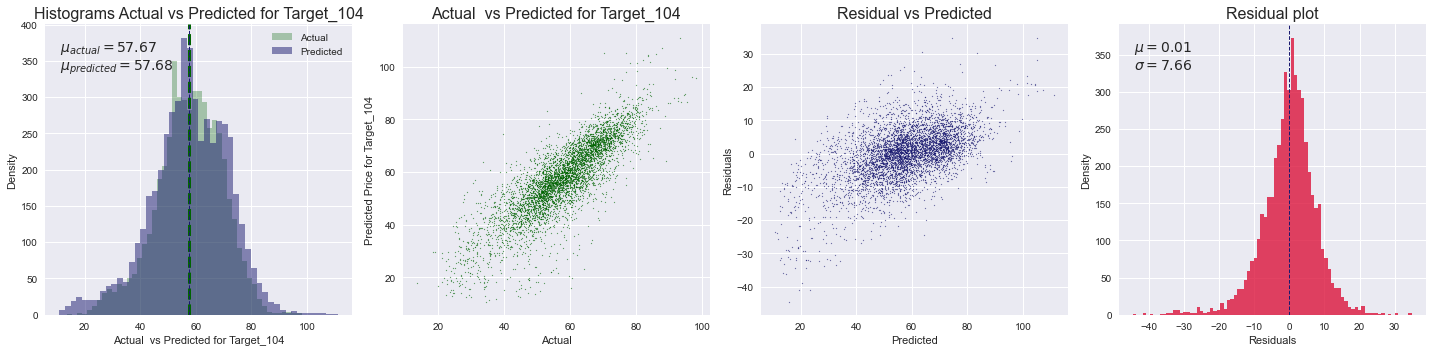

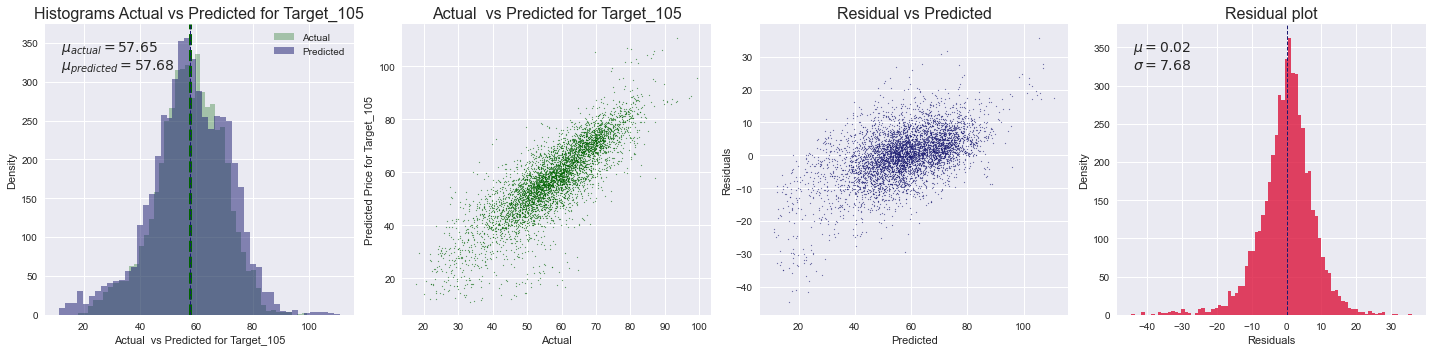

In [35]:
e_minus_o = get_and_plot_data(price_prediction_pca, price_target_test, start_index=100, stop_index=105)

In [36]:
print(get_ttest (price_prediction_pca, price_target_test, idx=101))

p-value: 0.8415405646386925
we are accepting null hypothesis


In [37]:
print(get_ztest (price_prediction_pca, price_target_test, idx=101))

p-value: 0.8415326400020999
accept null hypothesis


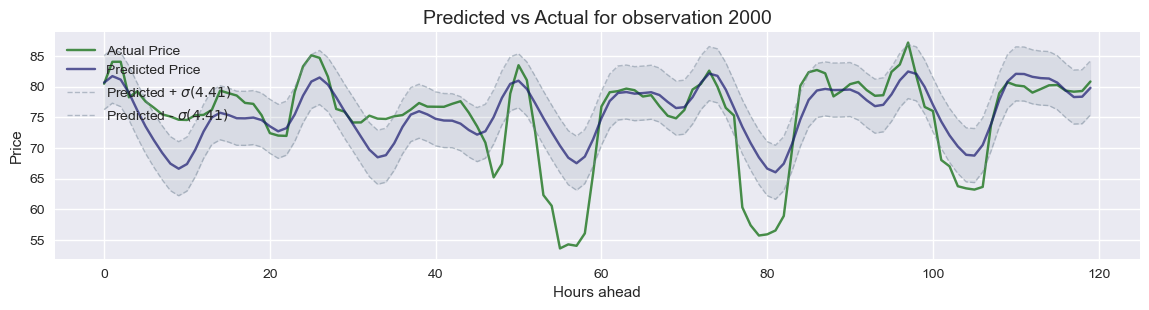

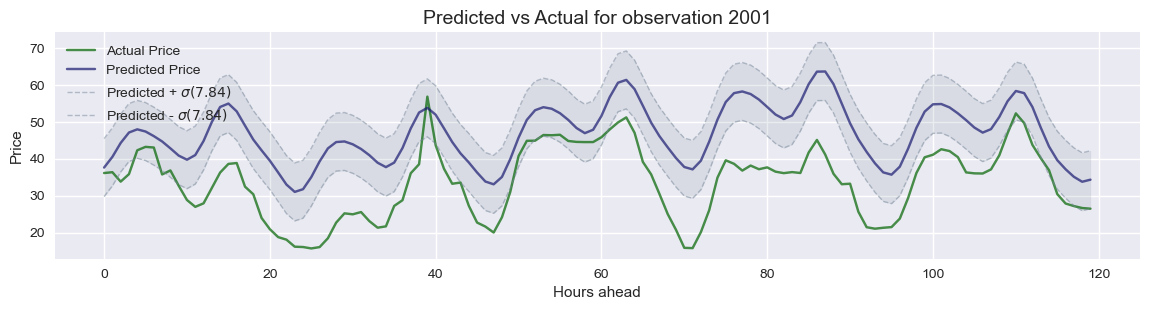

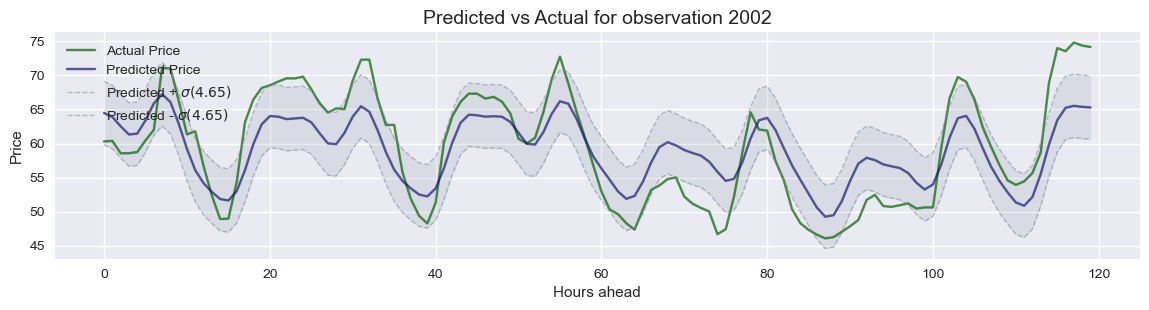

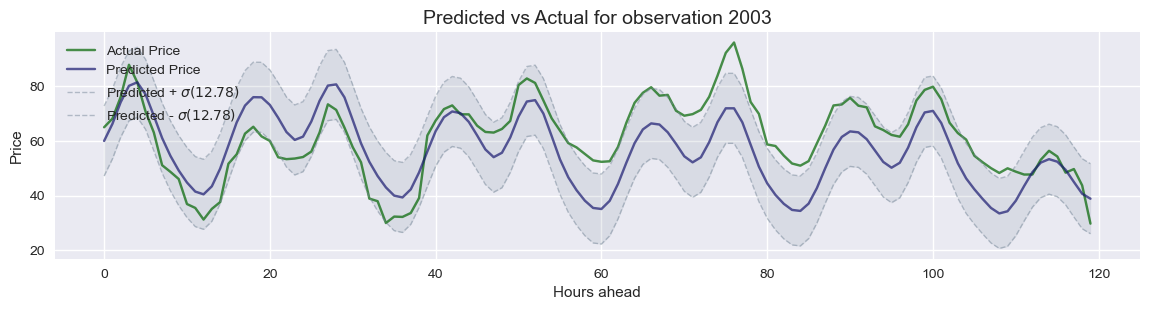

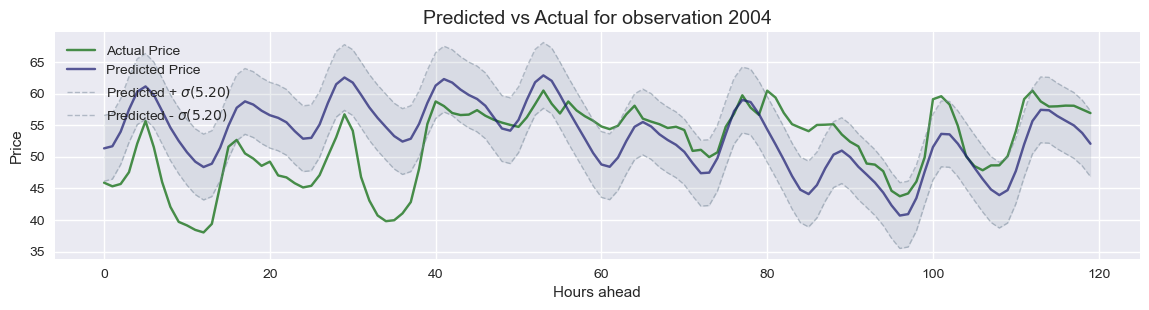

In [38]:
plot_actual_vs_prediction(price_prediction_pca, price_target_test, variable_name = 'Price', start_inx = 2000, end_inx = 2005)
# beteen 0 and 5131 ----> count of observations in test_dataset

Като цяло резултатите, които ни дава Ordinary LinearRegression не са особено високи. Като се има предвид, че искаме да прогнозираме цена, отдалечена на 144 периода напред във времето, това е в известна степен очакван резултат. Не се забелязва overfitting (тренировъчните и тестовите данни се представят по сходен начин), но модела определено не описва много добре данните (метриките са относително ниски). На фона на тази оценка не можем да очакваме значително по различни резултати, ако приложим познатите методи за регуляризация - Ridge и Lasso. По-специално, регулирането се прилага, за да се избегне пренастройване(overfitting) на данните. Идеята на регуляризацията е да се намали зависимостта на модела от данните, чрез ограничаване важността на отделните features.

### Multi-Output Ridge Regression

Въпреки, че не очакваме особени резултати от прилагане на регуляризация, нека проследим поведението на алгоритъма при налагане на ограничения от типа Ridge (L2 regularization) и Lasso (L1 regularization). 

При Ridge регресията добавяме наказателен член в cost function, който е пропорционален на квадрата на коефициента. Този наказателен член ограничава важността на входната променлива, но не я нулира.

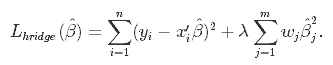

При Lasso, в наказателния член ползваме абсолютната стойност на коефициента. В някой от случаите този тип регуляризация може да нулира теглото на входните променливи и по този начин има ефект да свива измеренията.

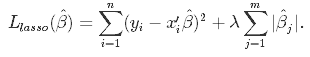

𝜆 – параметър за регулиране
𝜆>0, колкото е по-голямо ⇒ по-силно регулиране.

In [39]:
# Първоначално ще опитаме да визуализираме зависимостта на 𝜆 от теглата на регресията. 
# За различните Targets ползваме промеливата idx в диапазона [0, 120].

@timeit
def plot_alphas_result(X, Y, idx=0):
    clf = Ridge()
    coefs = []
    alphas = np.logspace(-6, 9, 10)

    for a in alphas:
        clf.set_params(alpha=a)
        clf.fit(X, Y)
        coefs.append(clf.coef_[idx])

    plt.figure(figsize=(40, 15))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(alphas, coefs, color='darkgreen', linewidth=0.2 )
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Ridge coefficients as a function of the regularization Alpha parameter')
    plt.axis('tight')

#     plt.annotate('Lasso is done at that point \nand all weights would be shrinked to zero', 
#     xy=(0.1, -0.6), xytext=(0.1, -0.4), arrowprops=dict(facecolor='midnightblue'), color='midnightblue', fontsize=16)
#     plt.grid(color='midnightblue', linestyle='dotted')
    plt.show()

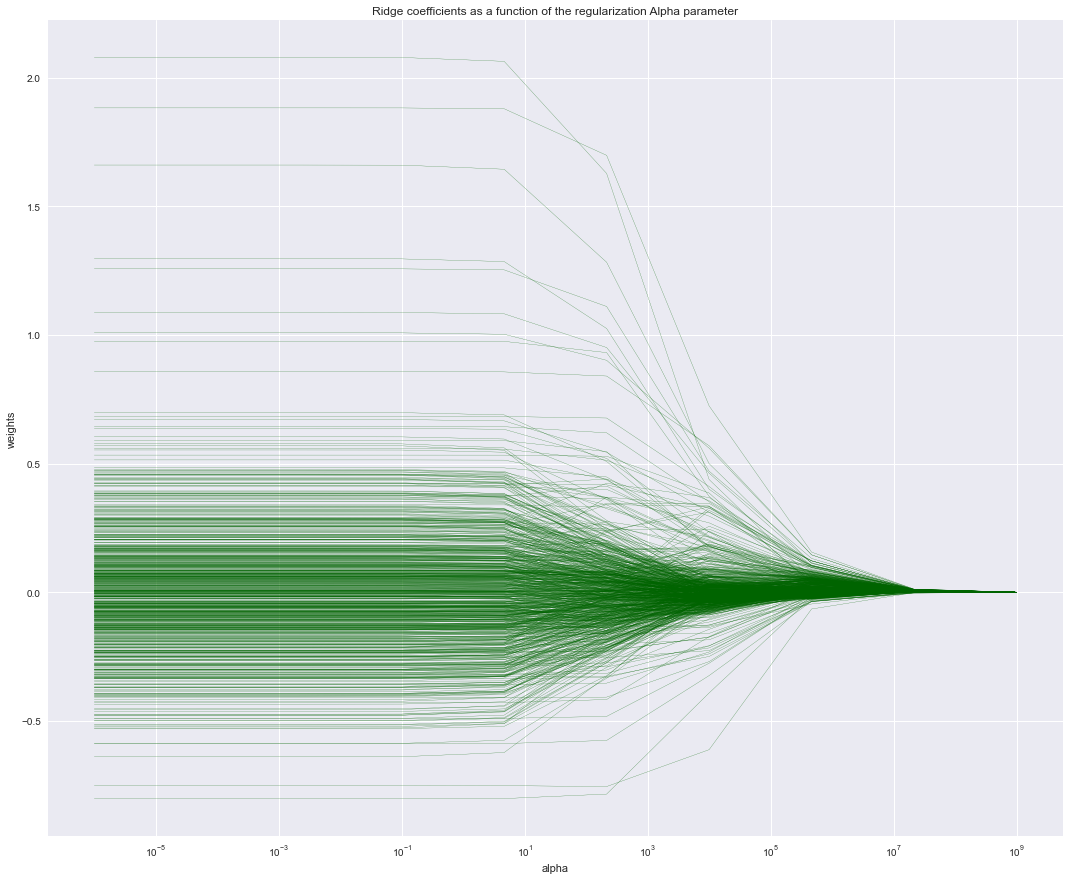

Function took 5.5457 seconds


In [40]:
plot_alphas_result(price_atribute_train, price_target_train, idx = 101)
# Около 10^3 е оптимално да се тества.

In [41]:
ridge = Ridge()

In [14]:
tuned_params = {
    "alpha": [1000, 2000, 2500, 3000]
}
cv = 3
price_ridge = get_grid_search(ridge, tuned_params, cv, price_atribute_train, price_target_train )

Ridge(alpha=2000)
Function took 13.3296 seconds


In [42]:
save_model(price_ridge, "#price_ridge.sav")

In [43]:
price_ridge = load_model("#price_ridge.sav")
price_ridge = price_ridge.best_estimator_

In [44]:
_, _, _, _ = cv_score(ridge, price_atribute_train, price_target_train)
# Cross validated Mean Squared Error: 51.140 (1.181)
# Cross validated Root Mean Squared Error: 7.143 (0.082)
# Cross validated Mean Absolute Error: 5.244 (0.053)
# Cross validated Coefficient of Determination: 0.744 (0.006)
# Function took 56.2553 seconds

In [45]:
_, _, _ = evaluation_report(price_ridge, price_atribute_train, price_target_train)

Score Results:
Mean squared error: 49.89
Root mean squared error: 7.06
Mean absolute error: 5.18
Coefficient of determination: 0.7509
Predicted mean: 57.731 (12.171)


In [46]:
_, _, _ = evaluation_report(price_ridge, price_atribute_test, price_target_test)

Score Results:
Mean squared error: 50.46
Root mean squared error: 7.10
Mean absolute error: 5.22
Coefficient of determination: 0.7405
Predicted mean: 57.681 (12.048)


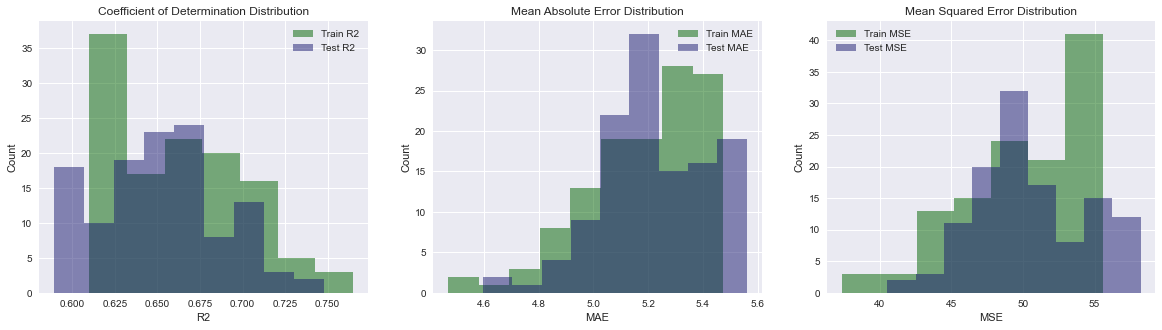

In [47]:
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = generate_score_distributions(price_ridge, price_atribute_train, price_target_train, price_atribute_test, price_target_test )

In [48]:
pv_r2_ttest = get_ttest_2samples(r2_train, r2_test)
pv_mae_ttest = get_ttest_2samples(mae_train, mae_test)
pv_mse_ttest = get_ttest_2samples(mse_train, mse_test)

p-value: 0.02149757559010487
we are rejecting null hypothesis
p-value: 0.1476657513881803
fail to reject the null hypothesis
p-value: 0.27977732638956054
fail to reject the null hypothesis


In [49]:
pv_r2_ztest = get_ztest_2samples(r2_train, r2_test)
pv_mae_ztest = get_ztest_2samples(mae_train, mae_test)
pv_mse_ztest = get_ztest_2samples(mse_train, mse_test)

p-value: 0.02064539227936
reject null hypothesis
p-value: 0.14634865923937931
fail to reject the null hypothesis
p-value: 0.2786810868061719
fail to reject the null hypothesis


In [50]:
price_prediction_ridge = price_ridge.predict(price_atribute_test)

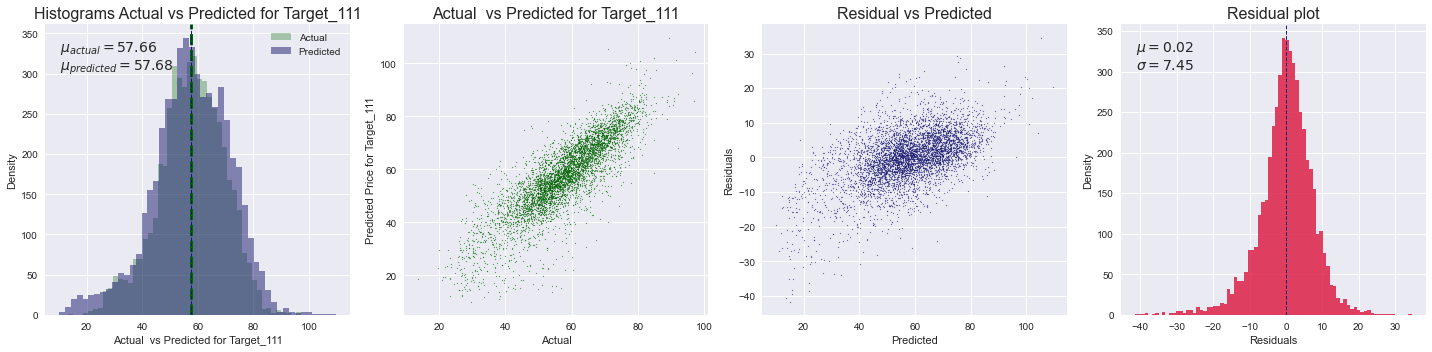

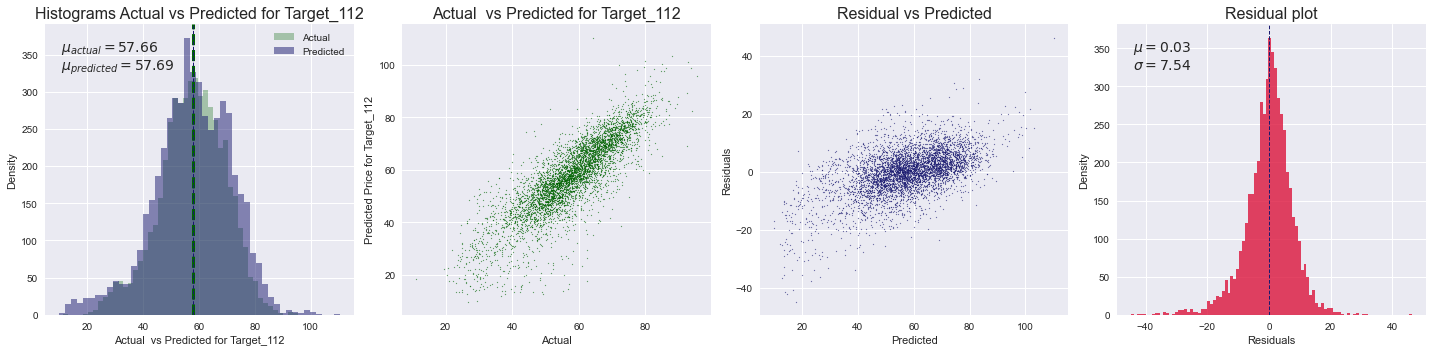

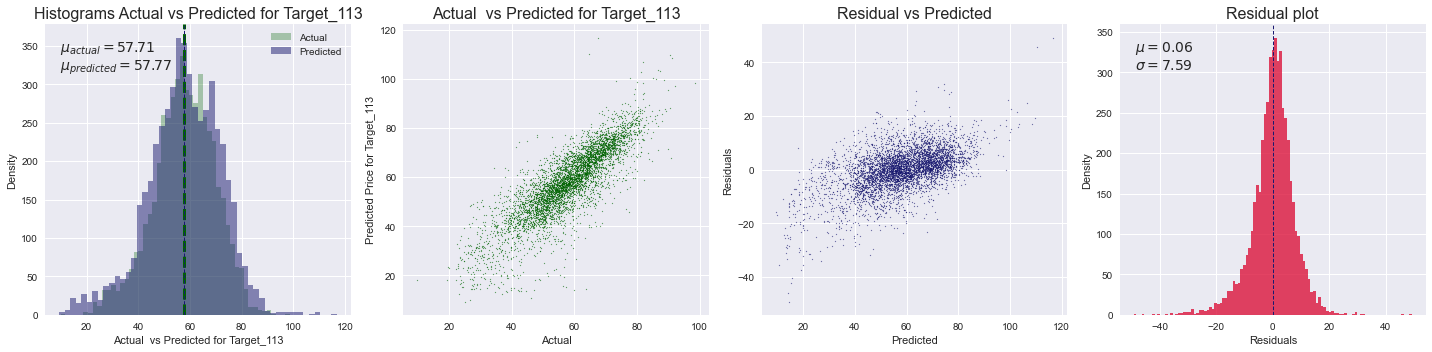

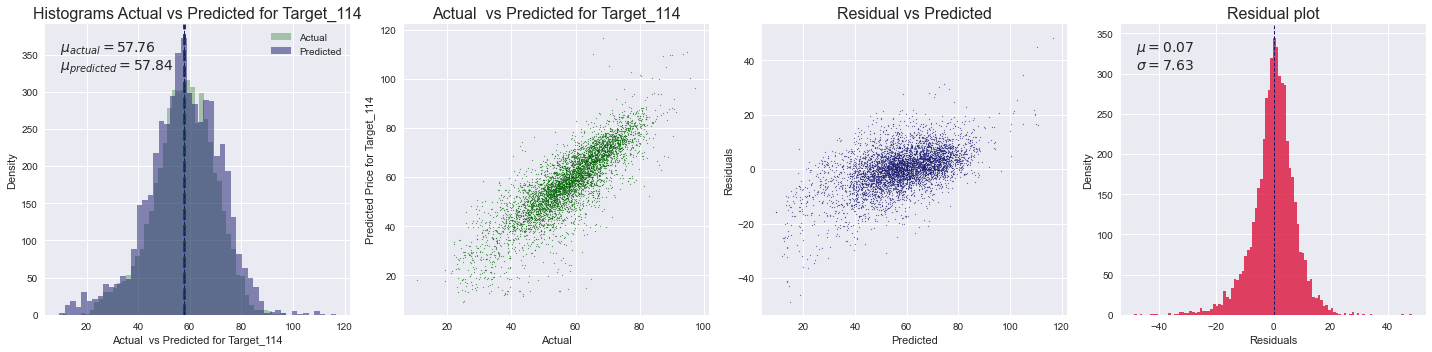

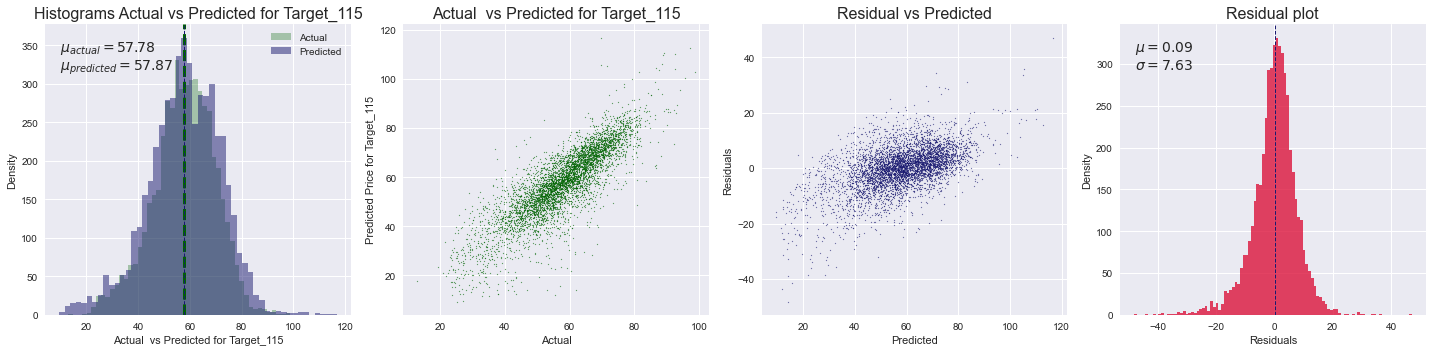

In [51]:
e_minus_o = get_and_plot_data(price_prediction_ridge, price_target_test, start_index=110, stop_index=115)

In [52]:
print(get_ttest (price_prediction_ridge, price_target_test, idx=101))

p-value: 0.9702976957483846
we are accepting null hypothesis


In [53]:
print(get_ztest (price_prediction_ridge, price_target_test, idx=101))

p-value: 0.9702962468951213
accept null hypothesis


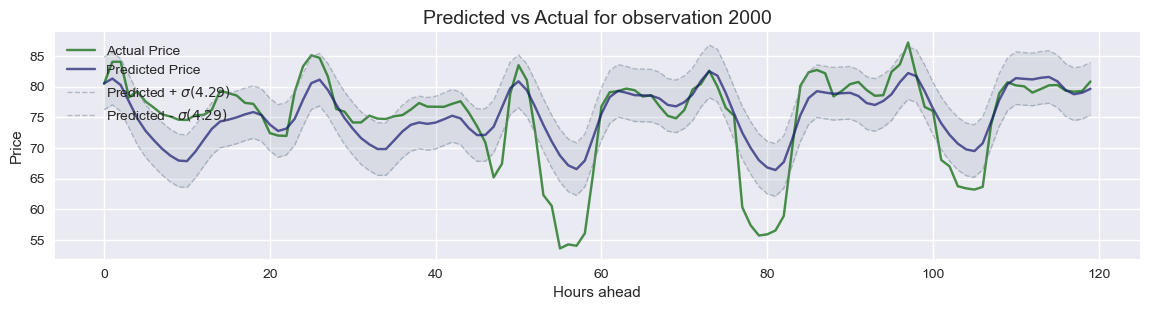

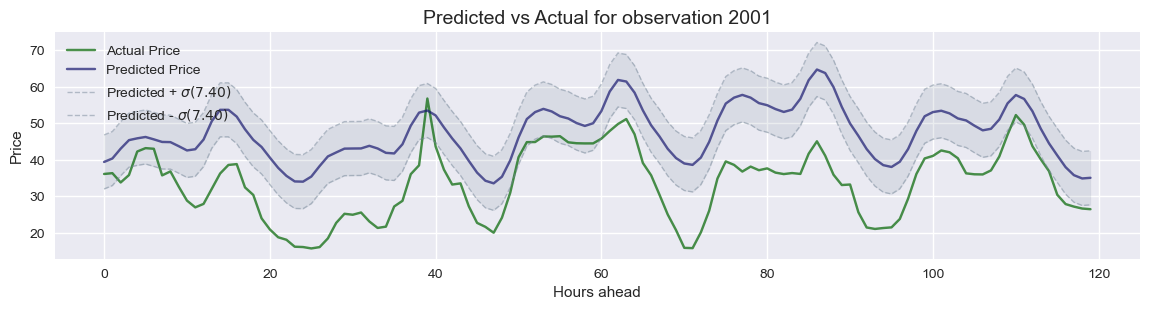

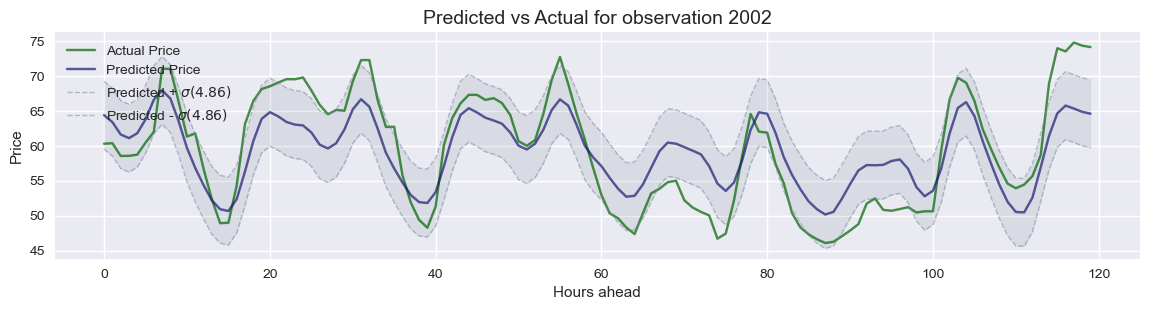

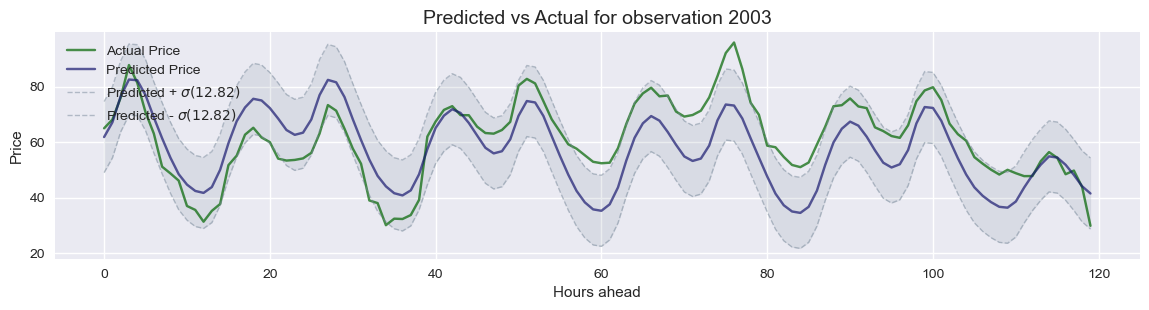

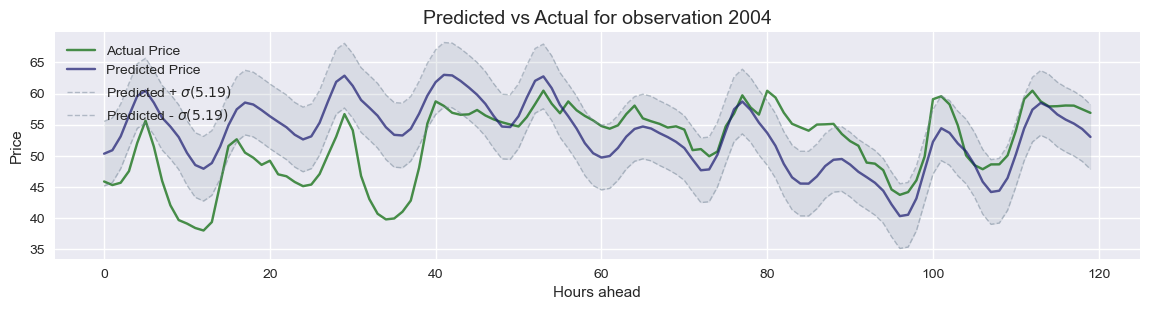

In [54]:
plot_actual_vs_prediction(price_prediction_ridge, price_target_test, variable_name = 'Price', start_inx = 2000, end_inx = 2005)
# beteen 0 and 5131 ----> count of observations in test_dataset

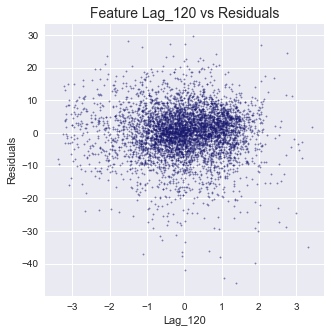

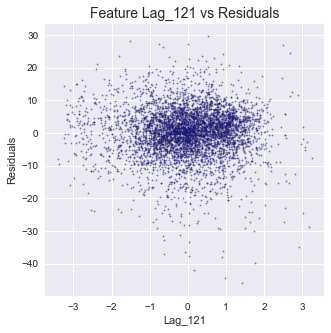

In [55]:
plot_feature_vs_residuals(price_atribute_test, price_attribute_col_names, 
                          price_prediction_ridge, price_target_test, start_index=200, stop_index=202, 
                          target_indx = 119, col_name = None) 

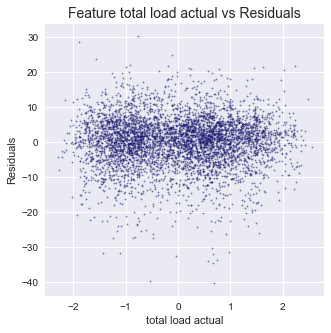

In [56]:
plot_feature_vs_residuals(price_atribute_test, price_attribute_col_names,  
                          price_prediction_ridge, price_target_test, start_index=155, stop_index=157, 
                          target_indx = 50, col_name = 'total load actual') 

### Multi-Output Lasso Regression

In [61]:
@timeit
def plot_alphas_result(X, Y, idx=0):
    clf = Lasso()
    coefs = []
    alphas = np.logspace(-4, 3, 5)

    for a in alphas:
        clf.set_params(alpha=a)
        clf.fit(X, Y)
        coefs.append(clf.coef_[idx])

    plt.figure(figsize=(40, 15))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(alphas, coefs, color='darkgreen', linewidth=0.2 )
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Lasso coefficients as a function of the regularization Alpha parameter')
    plt.axis('tight')

    plt.show()

C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451018.89696063247, tolerance: 579.9222818209267
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468607.1530970843, tolerance: 580.4728018487504
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488148.07462114067, tolerance: 581.3407599985635
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-p

C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598973.4635123531, tolerance: 581.3283394712154
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601927.4121323635, tolerance: 581.3600872969268
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603553.0925605459, tolerance: 581.3696569145189
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-pac

C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642493.1288321897, tolerance: 585.1954767317189
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643790.4024075019, tolerance: 585.2935800257543
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645248.3978708251, tolerance: 585.3020365413719
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-pac

C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684947.6572642893, tolerance: 583.9213334667057
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684014.1850080304, tolerance: 584.315969103431
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687995.0788507392, tolerance: 584.6810754232589
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-pack

C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696065.2817983389, tolerance: 580.7157209145892
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696158.5343067059, tolerance: 581.2099941290172
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697705.3273064438, tolerance: 580.6828292185492
  model = cd_fast.enet_coordinate_descent(
C:\Users\o.yordanova\anaconda3\envs\tfenv1\lib\site-pac

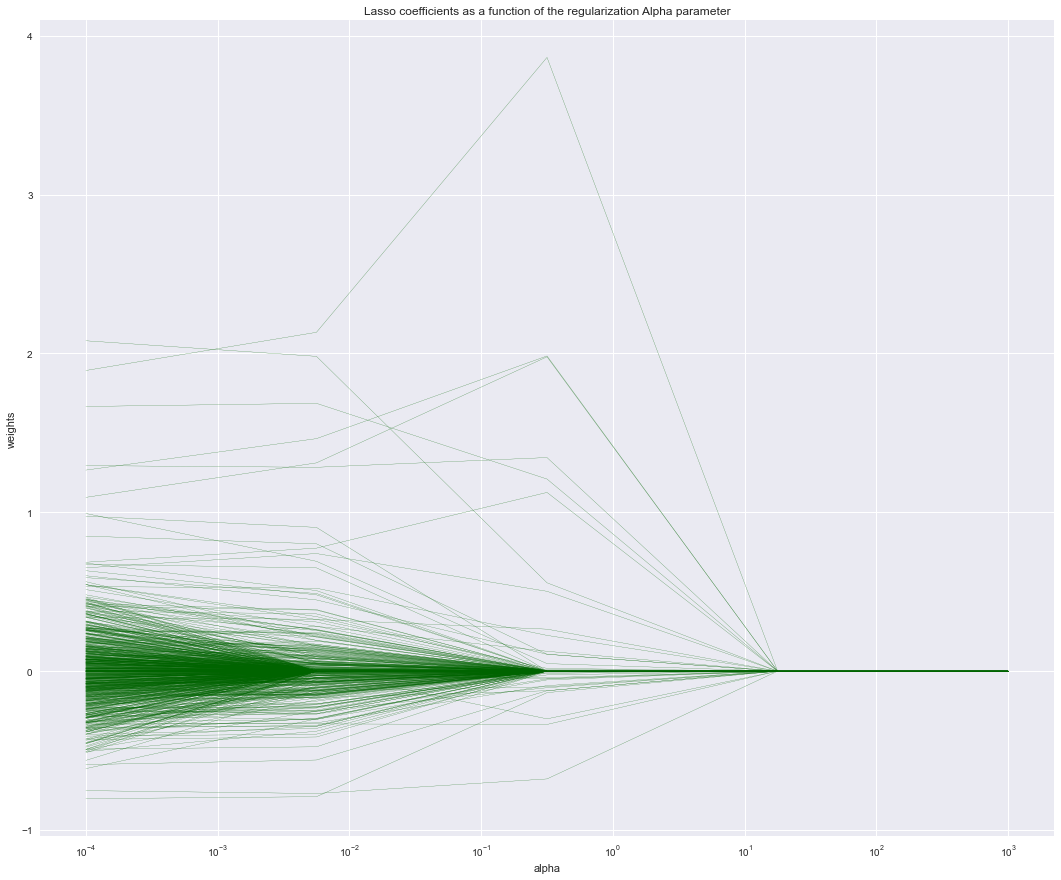

Function took 3971.2918 seconds


In [62]:
plot_alphas_result(price_atribute_train, price_target_train, idx = 101)
# Около [0.001, 0.1] е оптимално да се тества.

In [69]:
lasso = Lasso(tol=0.0001, max_iter=10000)

In [31]:
# Пробваме в диапазона [0.001--- 1]
tuned_params = {
    "alpha": [0.001, 0.01 , 0.1]
}
cv = 3

price_lasso = get_grid_search(lasso, tuned_params, cv, price_atribute_train, price_target_train )

Lasso(alpha=0.01, max_iter=10000)
Function took 11978.3507 seconds


In [70]:
save_model(price_lasso, "#price_lasso_alpha_0.01.sav")

In [71]:
price_lasso = load_model("#price_lasso_alpha_0.01.sav")
price_lasso = price_lasso.best_estimator_

In [72]:
_, _, _ = evaluation_report(price_lasso, price_atribute_train, price_target_train)

Score Results:
Mean squared error: 49.72
Root mean squared error: 7.04
Mean absolute error: 5.17
Coefficient of determination: 0.7517
Predicted mean: 57.731 (12.230)


In [73]:
_, _, _ = evaluation_report(price_lasso, price_atribute_test, price_target_test)

Score Results:
Mean squared error: 50.22
Root mean squared error: 7.08
Mean absolute error: 5.21
Coefficient of determination: 0.7417
Predicted mean: 57.678 (12.108)


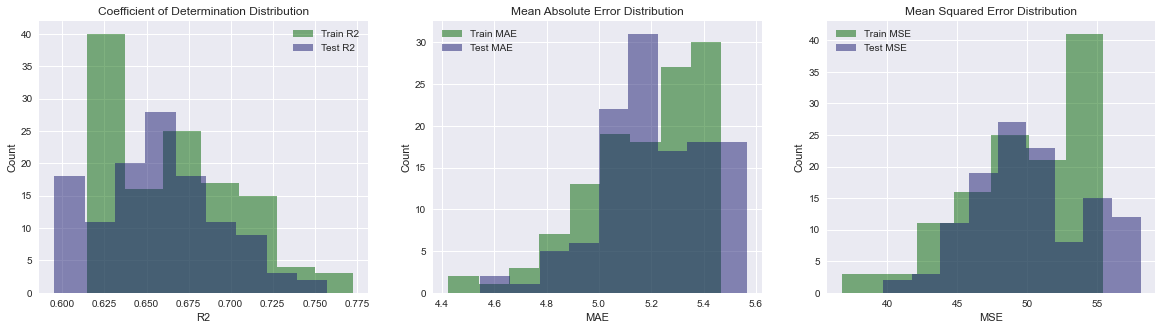

In [74]:
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = generate_score_distributions(price_lasso, price_atribute_train, price_target_train, price_atribute_test, price_target_test )

In [75]:
pv_r2_ttest = get_ttest_2samples(r2_train, r2_test)
pv_mae_ttest = get_ttest_2samples(mae_train, mae_test)
pv_mse_ttest = get_ttest_2samples(mse_train, mse_test)

p-value: 0.03390898759699106
we are rejecting null hypothesis
p-value: 0.17592602455406306
fail to reject the null hypothesis
p-value: 0.357128360301327
fail to reject the null hypothesis


In [76]:
pv_r2_ztest = get_ztest_2samples(r2_train, r2_test)
pv_mae_ztest = get_ztest_2samples(mae_train, mae_test)
pv_mse_ztest = get_ztest_2samples(mse_train, mse_test)

p-value: 0.03288583764523959
reject null hypothesis
p-value: 0.17464026236571406
fail to reject the null hypothesis
p-value: 0.35619397935049524
fail to reject the null hypothesis


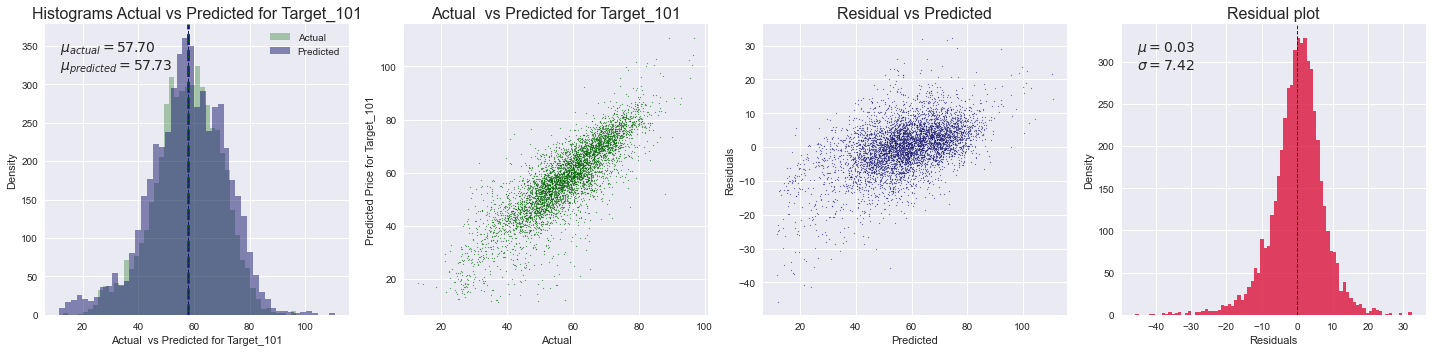

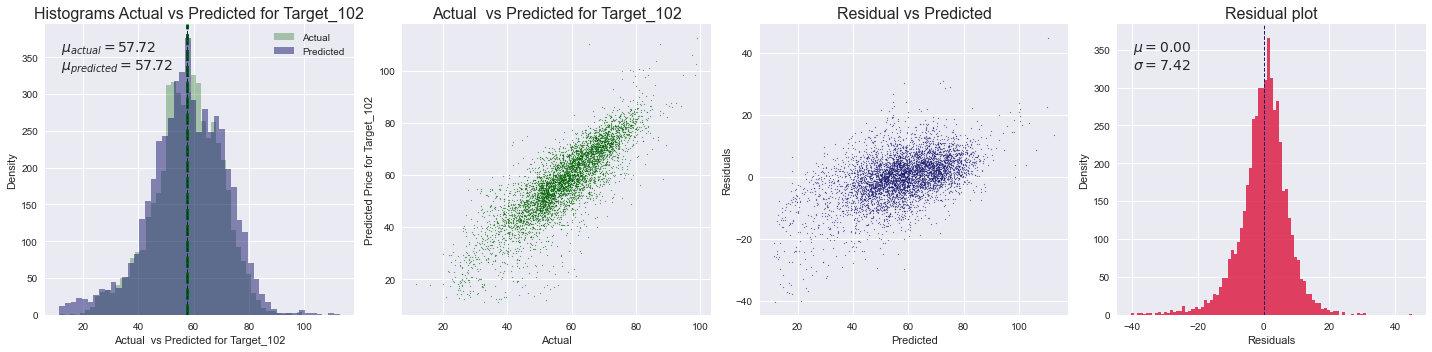

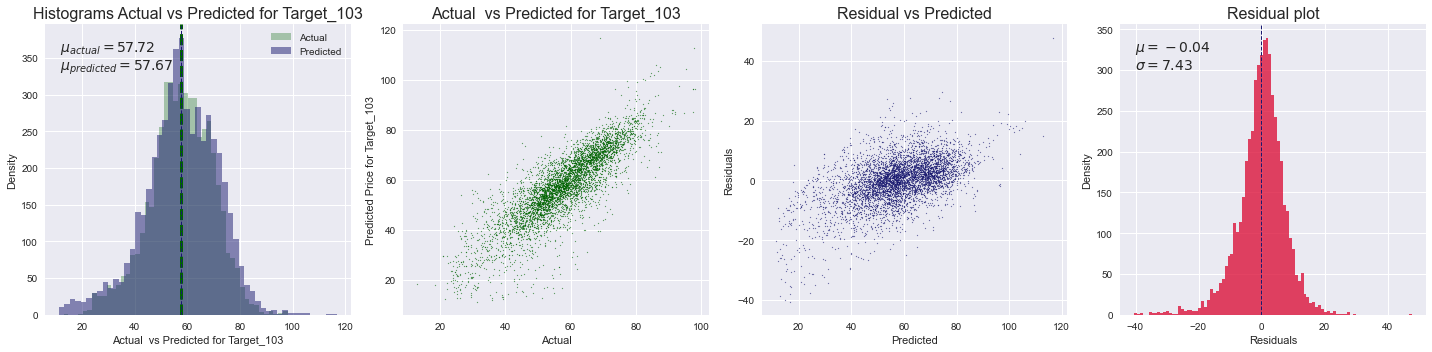

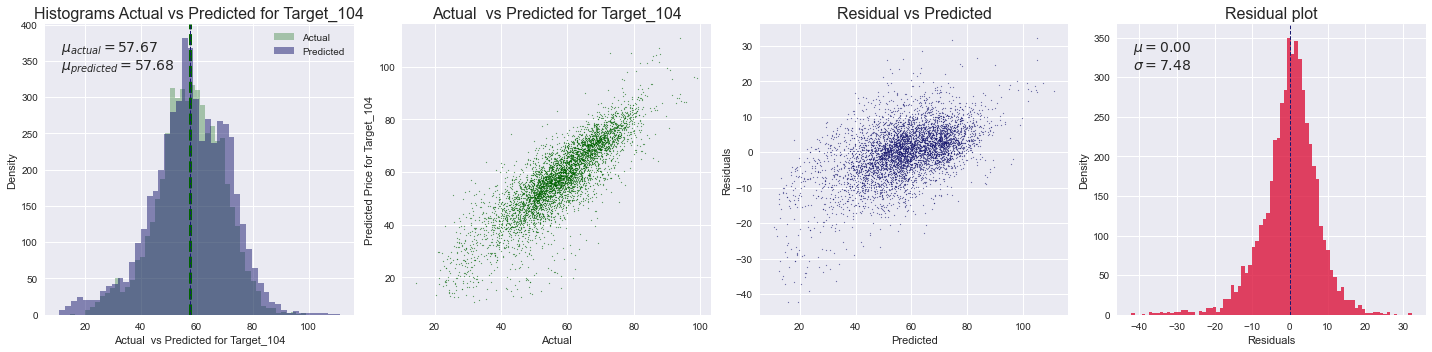

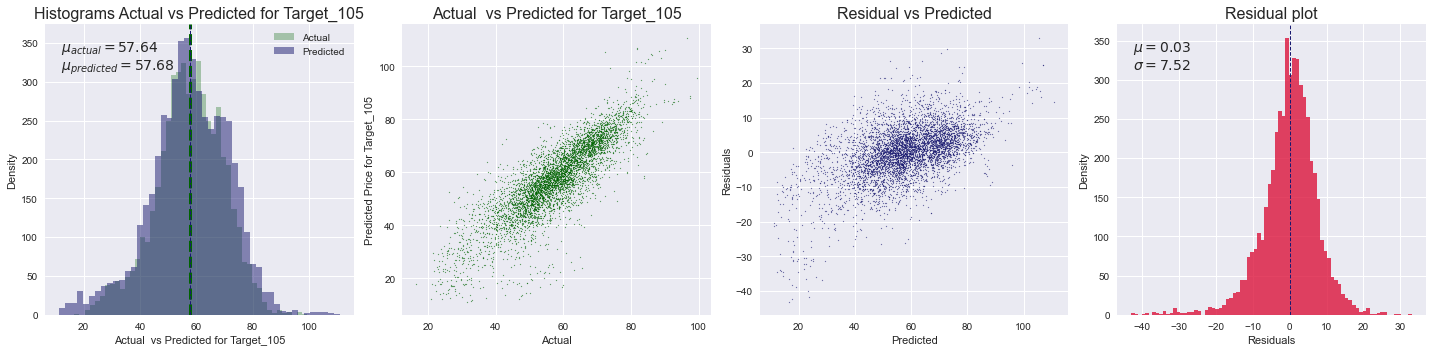

In [77]:
price_prediction_lasso = price_lasso.predict(price_atribute_test)
price_e_minus_o = get_and_plot_data(price_prediction_lasso, price_target_test, start_index=100, stop_index=105)

In [78]:
print(get_ttest (price_prediction_lasso, price_target_test, idx=101))

p-value: 0.9994562669503939
we are accepting null hypothesis


In [79]:
print(get_ztest (price_prediction_lasso, price_target_test, idx=101))

p-value: 0.9994562404520282
accept null hypothesis


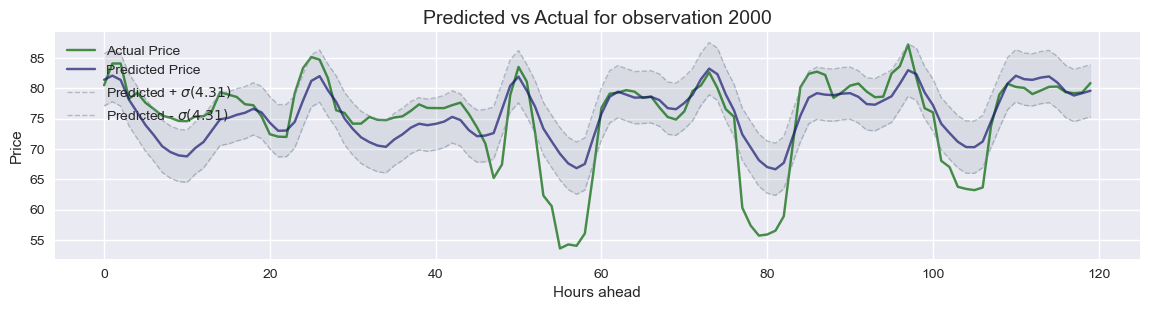

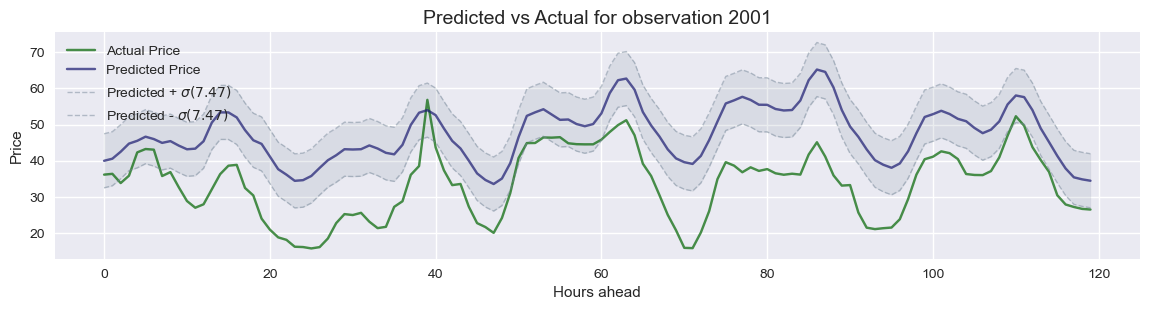

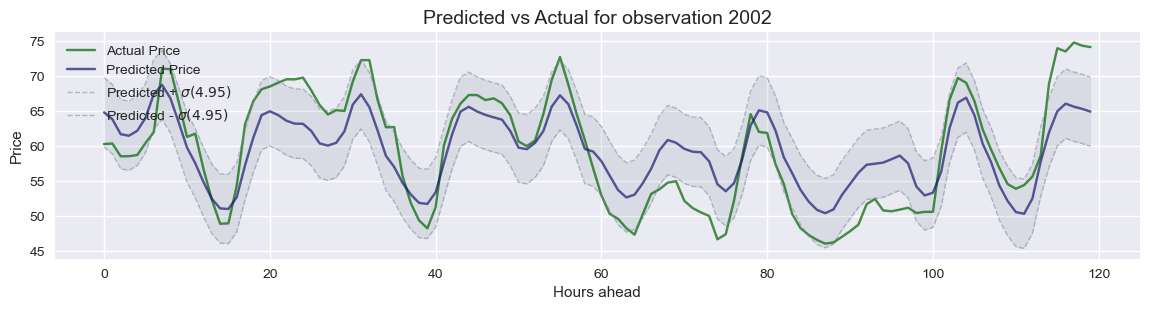

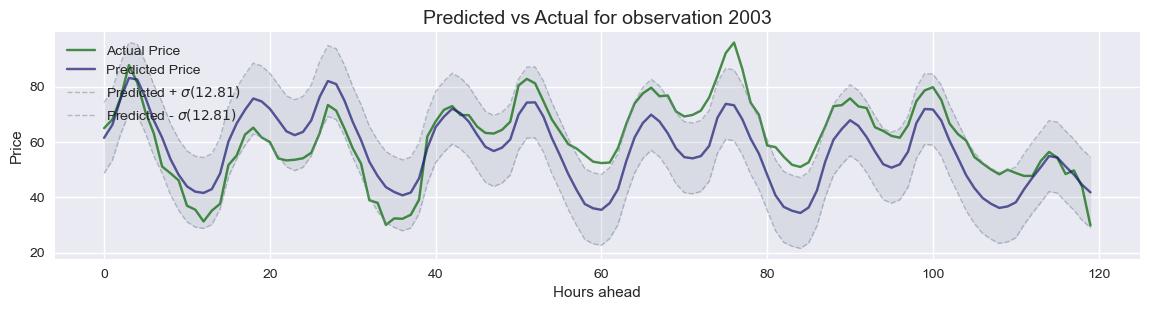

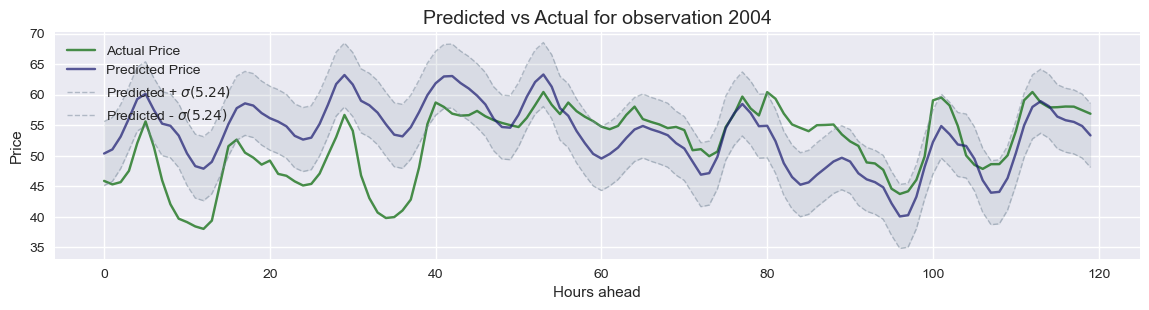

In [80]:
plot_actual_vs_prediction(price_prediction_lasso, price_target_test, variable_name = 'Price', start_inx = 2000, end_inx = 2005)

In [81]:
df_coef=pd.DataFrame()
df_coef["Feature Name"] = price_attribute_col_names
for i in range (0, 120):
    df_coef[f"Target_{i+1}"] = price_lasso.coef_[i]
df_coef

<ipython-input-81-68462ce46565>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_coef[f"Target_{i+1}"] = price_lasso.coef_[i]


Feature Name  Target_1  Target_2  Target_3  Target_4  \
0    weather_main_clouds_Barcelona -0.256122 -0.271278 -0.277979 -0.272956   
1      weather_main_dust_Barcelona  0.061652  0.069088  0.066075  0.080317   
2       weather_main_mist_Valencia -0.149180 -0.150446 -0.159059 -0.184746   
3         weather_main_mist_Bilbao  0.000000  0.000000  0.003564  0.018384   
4                wind_speed_Bilbao  0.139785  0.109873  0.097464  0.090114   
..                             ...       ...       ...       ...       ...   
796                        Lag_716  0.000000 -0.000000 -0.000000 -0.057151   
797                        Lag_717  0.000000 -0.000000 -0.036174 -0.106198   
798                        Lag_718 -0.000000 -0.026119 -0.000000 -0.000000   
799                        Lag_719 -0.000000 -0.000000 -0.000000  0.000000   
800                        Lag_720  0.000000  0.000000  0.000000  0.104574   

     Target_5  Target_6  Target_7  Target_8  Target_9  ...  Target_111  \
0   -0.315640 -0.321348 -0.349887 -0.357923 -0.331473  ...    0.000000   
1    0.086236  0.070753  0.072003  0.058086  0.048908  ...    0.126393   
2   -0.206056 -0.209062 -0.207160 -0.201668 -0.194693  ...   -0.003639   
3    0.029699  0.045183  0.059863  0.061833  0.051532  ...   -0.138041   
4    0.082373  0.075180  0.086325  0.087023  0.066215  ...    0.017783   
..        ...       ...       ...       ...       ...  ...         ...   
796 -0.169205 -0.020044 -0.031099 -0.015791 -0.000000  ...    0.000000   
797 -0.000000 -0.000000 -0.013668 -0.000000  0.000000  ...    0.094249   
798 -0.000000 -0.000000 -0.000000  0.000000  0.000000  ...    0.000000   
799 -0.000000 -0.000000  0.000000  0.000000  0.000000  ...    0.000000   
800  0.185399  0.255277  0.324996  0.327824  0.304613  ...   -0.000000   

     Target_112  Target_113  Target_114  Target_115  Target_116  Target_117  \
0      0.000000   -0.000000   -0.000000   -0.013511   -0.066357   -0.087861   
1      0.120293    0.106823    0.110133    0.120711    0.116228    0.117493   
2     -0.004933    0.000000    0.000000   -0.000000   -0.000000   -0.000000   
3     -0.122049   -0.107060   -0.126612   -0.136994   -0.128359   -0.139054   
4      0.009953    0.000000   -0.000000    0.000000   -0.000000   -0.000000   
..          ...         ...         ...         ...         ...         ...   
796    0.068414    0.000000   -0.000000   -0.088651   -0.000000   -0.000000   
797    0.000000   -0.000000   -0.014330   -0.000000   -0.000000    0.000000   
798    0.000000   -0.000000   -0.000000   -0.000000    0.000000    0.000000   
799   -0.000000   -0.000000   -0.000000    0.000000    0.000000    0.000000   
800   -0.000000    0.000000    0.020796    0.124885    0.185490    0.177347   

     Target_118  Target_119  Target_120  
0     -0.087619   -0.094218   -0.095446  
1      0.115366    0.115538    0.115437  
2     -0.012870   -0.001608   -0.000000  
3     -0.129010   -0.115945   -0.116389  
4      0.000000    0.000000    0.000000  
..          ...         ...         ...  
796    0.000000    0.000000    0.000000  
797    0.000000    0.000000    0.000000  
798    0.000000    0.000000    0.000000  
799    0.000000    0.000000    0.000000  
800    0.146406    0.093578    0.035781  

[801 rows x 121 columns]

In [82]:
(price_lasso.coef_[1]==0).sum()

519

In [83]:
len(price_lasso.coef_[1])-(price_lasso.coef_[1]==0).sum()

282

### Multi-Output Decision Tree Regression

Decision Tree е техника за контролирано обучение, която може да се използва както за проблеми с класификация, така и за регресия. Това е дървовидно структуриран класификатор, където вътрешните възли представляват характеристиките на набор от данни, клоновете представляват правилата за вземане на решения и всеки листов възел представлява резултата. Основно е предпочитана за задачи за класификация.<br>

Целева функция на Decision Tree се описва с: <br>
    
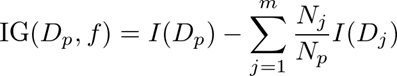

където:<br>
__IG__ - Information gain<br>
__f__ - feature, по който се извършване на разделянето<br>
$D_p$, $D_j$  - набори от данни на родителските и дъщерните възли<br>
$N_p$, $N_j$ - размер на извадките (в родителски / дъщерни възли)<br>
__I__ - impurity measure/index<br>

Има основно три __Impurity measures__:
- __Entropy__  - Можем интуитивно да представим горната формула като:
$$Information Gain= Entropy(Parent Decision Node)–(Average Entropy(Child Nodes))$$
Формално произволността в данните е известна като „Ентропия“, а разликата между „Ентропията“ преди и след разделянето е известна като „Придобиване на информация“(IG). Така става видно, че Дървото на решенията ще раздели данните, като използва функцията, която осигурява най-голяма печалба от информация.  
- __Gini index__ - подобна на Entropy.

- __Misclassification error__ - основното неудобство е, че е прекъсната в нулата.

Математически горните величини се изразяват по следния начин:

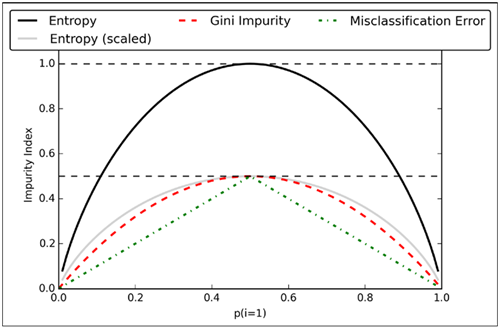


$$entropy = -p * np.log2(p) - (1 - p) * np.log2((1 - p))$$

$$gini\_index = p * (1 - p) + (1 - p) * (1 - (1 - p))$$

$$misclassification\_error = 1 - np.max([p, 1 - p])$$

където:
p e вероятността за клас 1 (0≤𝑝≤1) и е максимално за 𝑝 = 0,5

- При задачи за класификация Дървото на решенията обичайно използва критерии за избор „Entropy“ или „Gini“, за да раздели данните.
- В Sklearn критериите за избор при регресия обичайно са „mse“ и „mae“.

Дърветата са слаби регресори, но ще опитаме да ги приложим на нашите данни, тъй като са в основата на някой доста силни ансамблови алгоритми.

По долу са тествани различни варианти на оптимизация  на DecisionTreeRegressor върху всички данни, като всички те дават признаци на overfitting. Използването на DecisionTreeRegressor с редуцираните от РСА данни, не подобри значително overfitting-а.

In [86]:
price_decision_tree_regression = DecisionTreeRegressor().fit(price_atribute_train, price_target_train)

In [87]:
_, _, _ = evaluation_report(price_decision_tree_regression, price_atribute_train, price_target_train)

Score Results:
Mean squared error: 0.00
Root mean squared error: 0.00
Mean absolute error: 0.00
Coefficient of determination: 1.0000
Predicted mean: 57.731 (14.151)


In [88]:
_, _, _ = evaluation_report(price_decision_tree_regression, price_atribute_test, price_target_test)

Score Results:
Mean squared error: 89.77
Root mean squared error: 9.47
Mean absolute error: 6.49
Coefficient of determination: 0.5387
Predicted mean: 57.803 (13.879)


In [89]:
price_decision_tree_regression.decision_path(price_atribute_train[:100])

<100x58141 sparse matrix of type '<class 'numpy.int64'>'
	with 1920 stored elements in Compressed Sparse Row format>

In [90]:
(price_target_train["Target_1"]).to_numpy()

array([44.59, 68.03, 68.3 , ..., 28.24, 57.14, 43.55])

In [17]:
decision_tree =  DecisionTreeRegressor()
tuned_params = {
    "max_depth": [5, 10, 15, 20, 50, 100],
    "max_leaf_nodes": [100, 500, 800, 1000],
}

cv = 3
price_decision_tree_regression = get_grid_search(decision_tree, tuned_params, cv, price_atribute_train, price_target_train )

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=1000)
Function took 872.2559 seconds


In [91]:
save_model(price_decision_tree_regression, "#price_decision_tree_regression_mln.sav")

In [92]:
price_decision_tree_regression = load_model("#price_decision_tree_regression_mln.sav")
price_decision_tree_regression = price_decision_tree_regression.best_estimator_

In [93]:
_, _, _ = evaluation_report(price_decision_tree_regression, price_atribute_train, price_target_train)

Score Results:
Mean squared error: 50.15
Root mean squared error: 7.08
Mean absolute error: 5.39
Coefficient of determination: 0.7495
Predicted mean: 57.731 (12.251)


In [94]:
_, _, _ = evaluation_report(price_decision_tree_regression, price_atribute_test, price_target_test)

Score Results:
Mean squared error: 74.89
Root mean squared error: 8.65
Mean absolute error: 6.36
Coefficient of determination: 0.6153
Predicted mean: 57.837 (11.863)


In [95]:
price_decision_tree_regression_proba = DecisionTreeRegressor(max_depth=15, min_samples_leaf = 80).fit(price_atribute_train, price_target_train)

In [97]:
_, _, _ = evaluation_report(price_decision_tree_regression_proba, price_atribute_train, price_target_train)

# Score Results:
# Mean squared error: 74.74
# Root mean squared error: 8.64
# mean_absolute_error: 6.43
# Coefficient of determination: 0.6267
# Predicted mean: 57.731 (11.203)


In [98]:
_, _, _ = evaluation_report(price_decision_tree_regression_proba, price_atribute_test, price_target_test)

# Score Results:
# Mean squared error: 81.80
# Root mean squared error: 9.04
# mean_absolute_error: 6.71
# Coefficient of determination: 0.5798
# Predicted mean: 57.864 (11.055)


In [45]:
decision_tree =  DecisionTreeRegressor()
tuned_params = {
    "max_depth": [5, 10, 15, 20, 50, 100],
    "min_samples_leaf": [20, 50, 80, 100, 120, 150],
}

cv = 3
price_decision_tree_regression_msl = get_grid_search(decision_tree, tuned_params, cv, price_atribute_train )

DecisionTreeRegressor(max_depth=100, min_samples_leaf=20)
Function took 1599.0802 seconds


In [99]:
save_model(price_decision_tree_regression_msl, "#price_decision_tree_regression_msl.sav")

In [101]:
price_decision_tree_regression_msl = load_model("#price_decision_tree_regression_msl.sav")
price_decision_tree_regression_msl = price_decision_tree_regression_msl.best_estimator_

In [102]:
_, _, _ = evaluation_report(price_decision_tree_regression_msl, price_atribute_train, price_target_train)

Score Results:
Mean squared error: 55.20
Root mean squared error: 7.43
Mean absolute error: 5.50
Coefficient of determination: 0.7243
Predicted mean: 57.731 (12.043)


In [103]:
_, _, _ = evaluation_report(price_decision_tree_regression_msl, price_atribute_test, price_target_test)

Score Results:
Mean squared error: 75.58
Root mean squared error: 8.69
Mean absolute error: 6.39
Coefficient of determination: 0.6117
Predicted mean: 57.870 (11.734)


### Multi-Output Decision Tree Regression with PCA data preprocessing

In [33]:
decision_tree_pca =  DecisionTreeRegressor()
tuned_params = {
    "max_depth": [5, 10, 15, 20, 30, 50],
    "max_leaf_nodes": [1000, 1200, 1500, 2000, 3000],
}

cv = 3
price_decision_tree_regression_pca = get_grid_search(decision_tree_pca, tuned_params, cv, PC_train, price_target_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=2000)
Function took 278.6844 seconds


In [104]:
save_model(price_decision_tree_regression_pca, "#price_decision_tree_regression_pca.sav")

In [105]:
price_decision_tree_regression_pca = load_model("#price_decision_tree_regression_pca.sav")
price_decision_tree_regression_pca = price_decision_tree_regression_pca.best_estimator_

In [106]:
_, _, _ = evaluation_report(price_decision_tree_regression_pca, PC_train, price_target_train)

Score Results:
Mean squared error: 31.69
Root mean squared error: 5.63
Mean absolute error: 4.28
Coefficient of determination: 0.8417
Predicted mean: 57.731 (12.983)


In [107]:
_, _, _ = evaluation_report(price_decision_tree_regression_pca, PC_test, price_target_test)

Score Results:
Mean squared error: 55.19
Root mean squared error: 7.43
Mean absolute error: 5.38
Coefficient of determination: 0.7164
Predicted mean: 57.789 (12.677)


In [108]:
price_decision_tree_regression_pca_proba = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=800).fit(PC_train, price_target_train)

In [109]:
save_model(price_decision_tree_regression_pca_proba, "#price_decision_tree_regression_pca_optimal.sav")

In [110]:
price_decision_tree_regression_pca_proba = load_model('#price_decision_tree_regression_pca_optimal.sav')

In [111]:
_, _, _ = evaluation_report(price_decision_tree_regression_pca_proba, PC_train, price_target_train)

Score Results:
Mean squared error: 45.06
Root mean squared error: 6.71
Mean absolute error: 5.10
Coefficient of determination: 0.7749
Predicted mean: 57.731 (12.457)


In [112]:
_, _, _ = evaluation_report(price_decision_tree_regression_pca_proba, PC_test, price_target_test)

Score Results:
Mean squared error: 57.29
Root mean squared error: 7.57
Mean absolute error: 5.60
Coefficient of determination: 0.7057
Predicted mean: 57.778 (12.159)


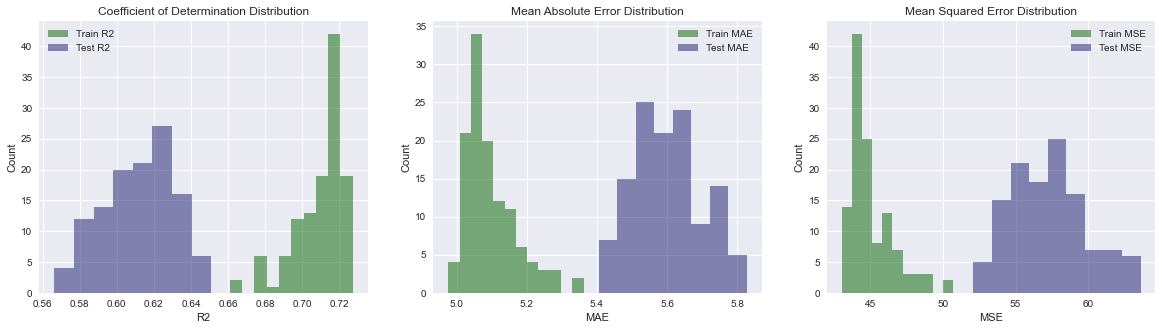

In [113]:
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = generate_score_distributions(price_decision_tree_regression_pca_proba, PC_train, price_target_train, PC_test, price_target_test )

In [114]:
pv_r2_ttest = get_ttest_2samples(r2_train, r2_test)
pv_mae_ttest = get_ttest_2samples(mae_train, mae_test)
pv_mse_ttest = get_ttest_2samples(mse_train, mse_test)

p-value: 1.2024496519429687e-119
we are rejecting null hypothesis
p-value: 1.8938767931185809e-118
we are rejecting null hypothesis
p-value: 1.6430482717540982e-117
we are rejecting null hypothesis


In [115]:
pv_r2_ztest = get_ztest_2samples(r2_train, r2_test)
pv_mae_ztest = get_ztest_2samples(mae_train, mae_test)
pv_mse_ztest = get_ztest_2samples(mse_train, mse_test)

p-value: 0.0
reject null hypothesis
p-value: 0.0
reject null hypothesis
p-value: 0.0
reject null hypothesis


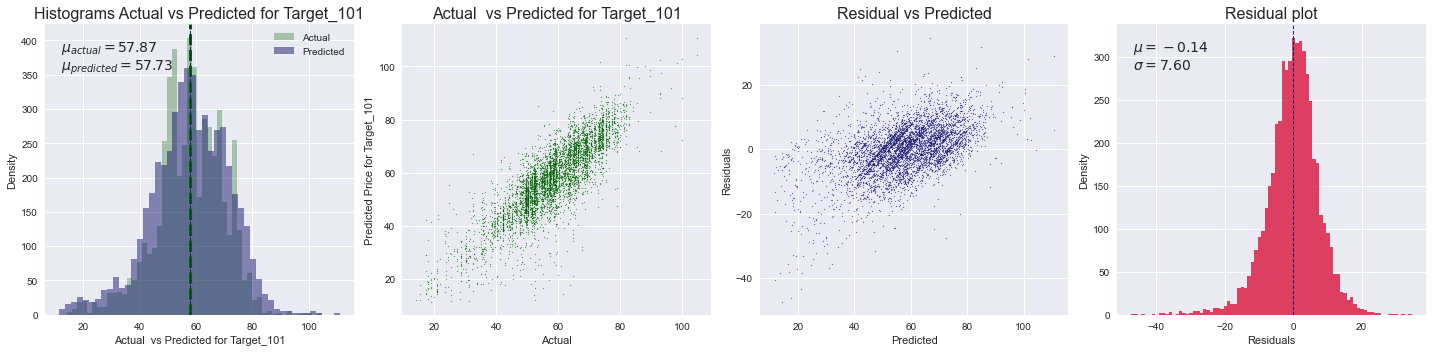

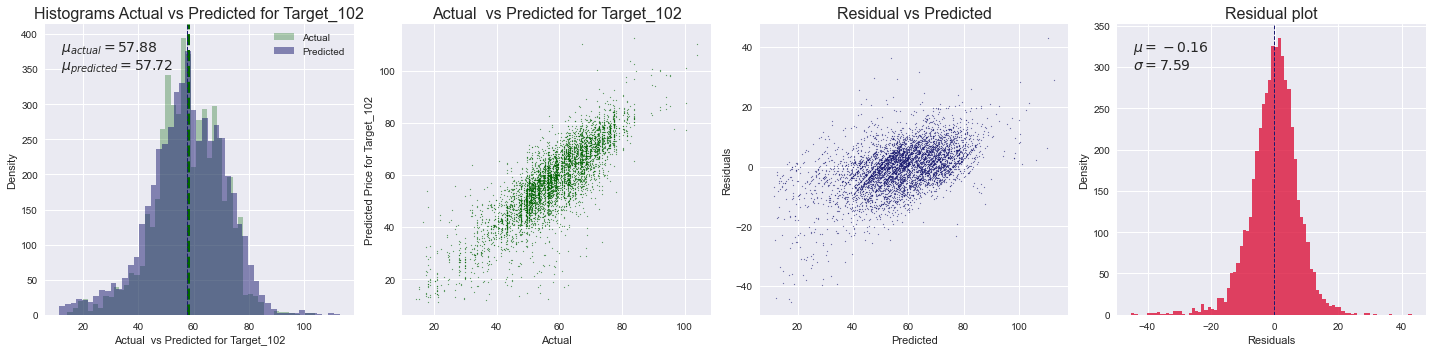

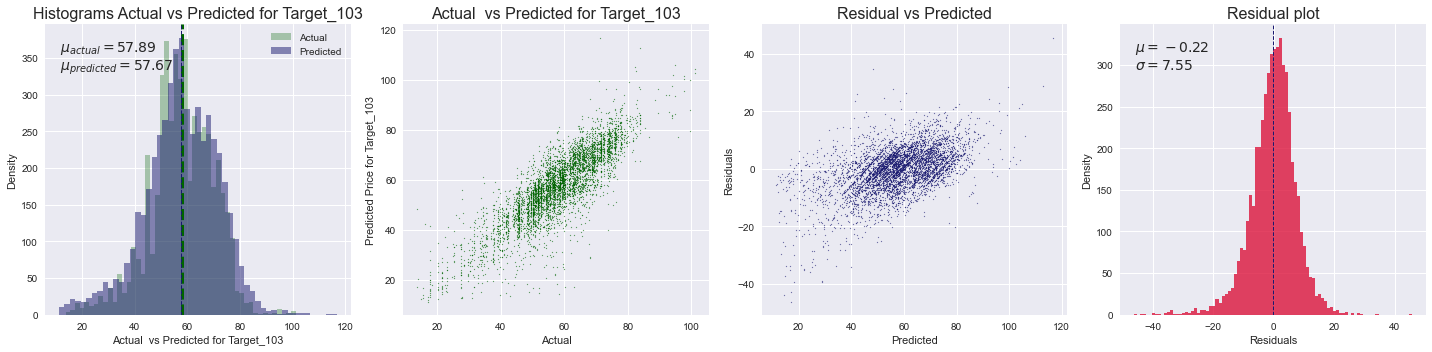

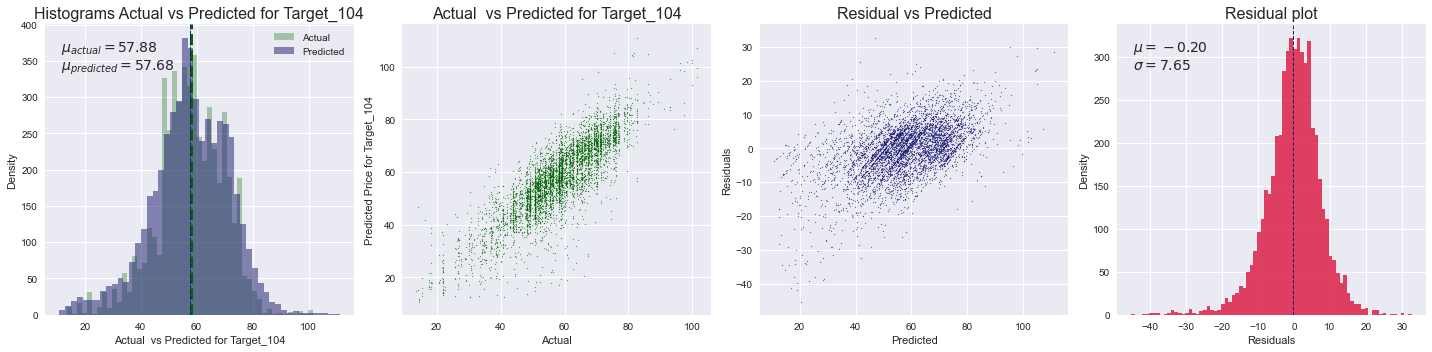

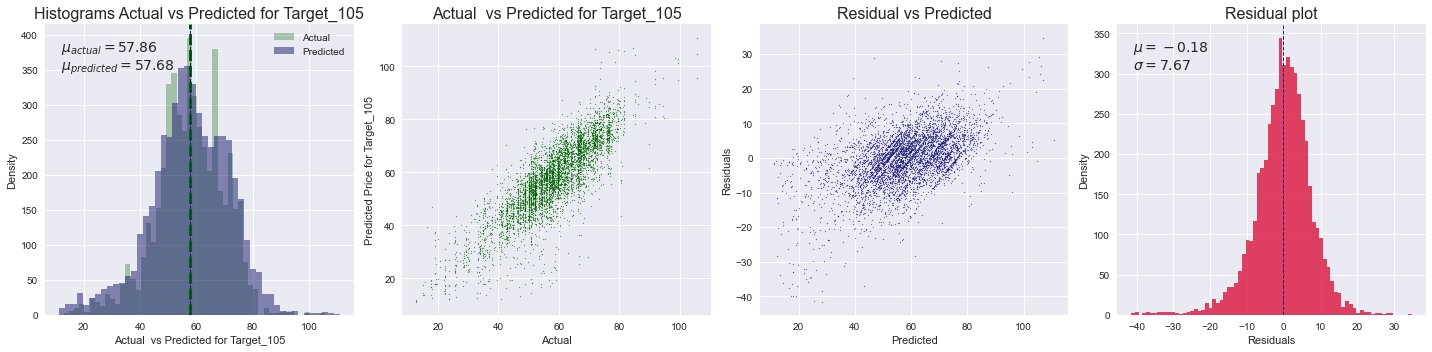

In [116]:
price_prediction_decision_tree_pca = price_decision_tree_regression_pca_proba.predict(PC_test)
price_e_minus_o = get_and_plot_data(price_prediction_decision_tree_pca, price_target_test, start_index=100, stop_index=105)

In [117]:
print(get_ttest (price_prediction_decision_tree_pca, price_target_test, idx=101))

p-value: 0.12676213028747146
we are accepting null hypothesis


In [118]:
print(get_ztest (price_prediction_decision_tree_pca, price_target_test, idx=101))

p-value: 0.12670048043532234
accept null hypothesis


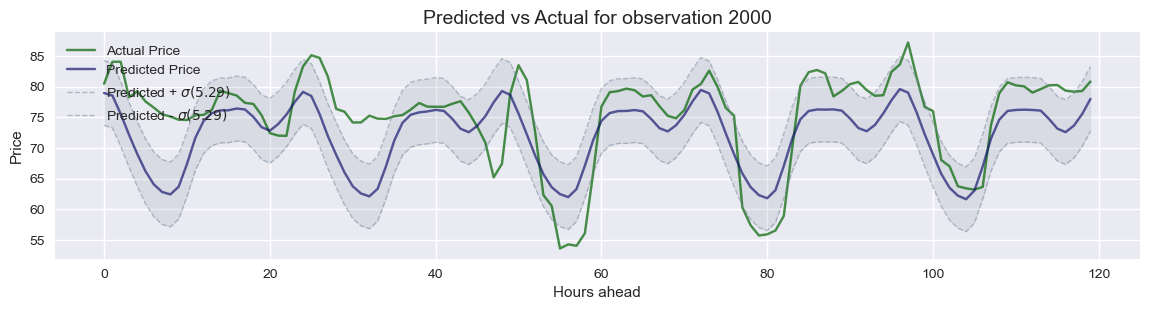

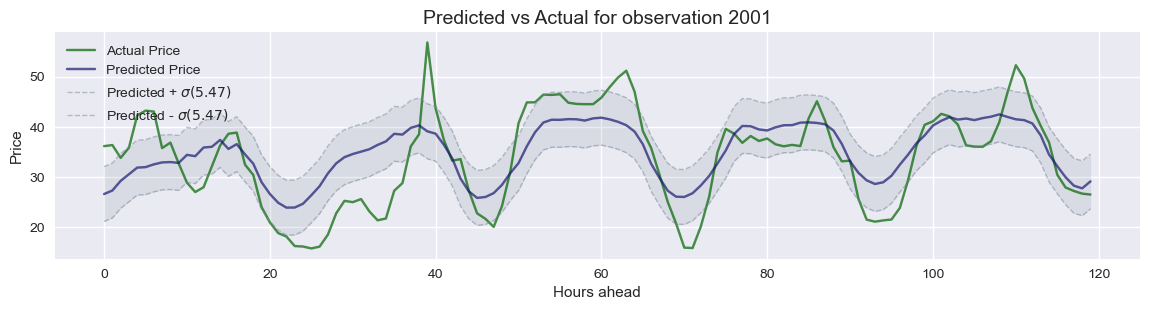

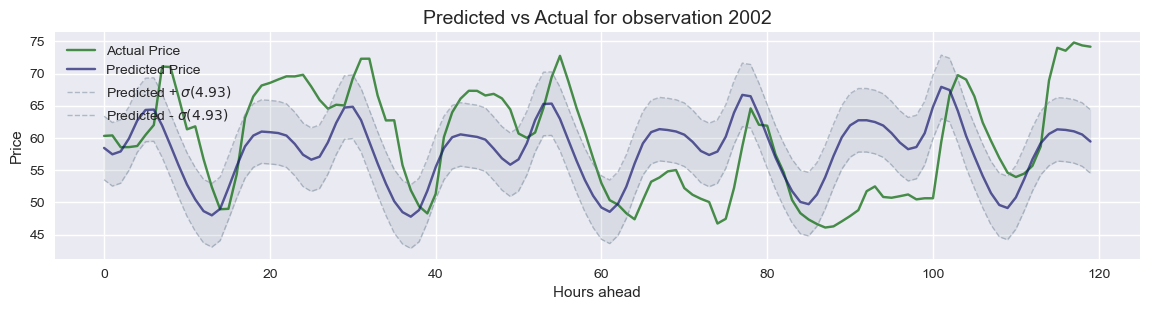

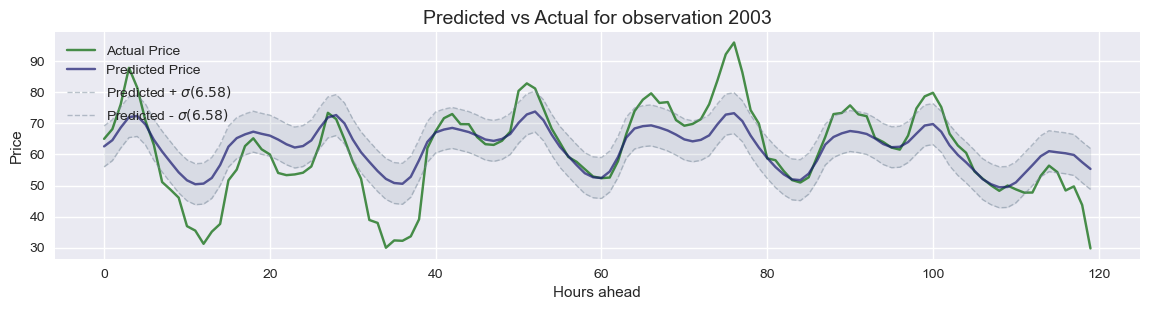

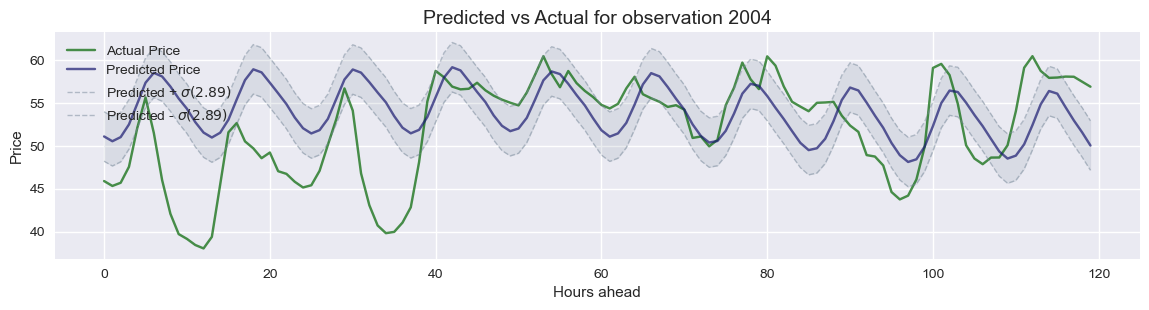

In [119]:
plot_actual_vs_prediction(price_prediction_decision_tree_pca, price_target_test, variable_name = 'Price', start_inx = 2000, end_inx = 2005)

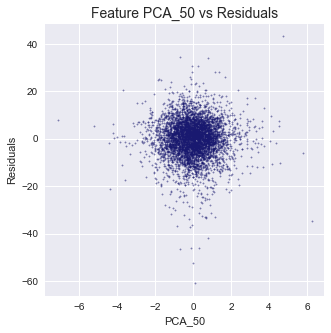

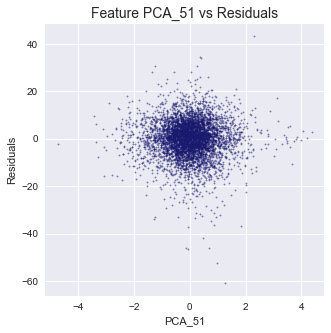

In [120]:
plot_feature_vs_residuals_PCA(PC_test, price_prediction_decision_tree_pca, price_target_test, 
                              start_index=50, stop_index=52, target_indx = 119, col_name = None) 

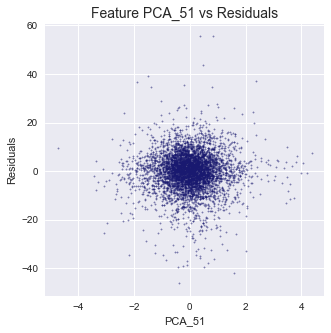

In [121]:
plot_feature_vs_residuals_PCA(PC_test, price_prediction_decision_tree_pca, price_target_test, 
                              start_index=50, stop_index=52, target_indx = 1, col_name = 'PCA_51') 

In [122]:
pd.DataFrame(PC_test).iloc[:, 51].min(), pd.DataFrame(PC_test).iloc[:, 51].max()

(-4.7098445159839635, 4.3643422560713505)

In [123]:
zipped=list(zip([f"PCA_{j}" for j in range(0, PC_train.shape[1])], price_decision_tree_regression_pca_proba.feature_importances_))
feature_importances = sorted(zipped, key = lambda x: x[1], reverse=True)
feature_importances

[('PCA_0', 0.5718748534769162),
 ('PCA_1', 0.06323286416711049),
 ('PCA_4', 0.054351276935899),
 ('PCA_2', 0.05097611890802122),
 ('PCA_5', 0.04806000513050385),
 ('PCA_3', 0.04789563672014122),
 ('PCA_9', 0.022123460720485464),
 ('PCA_8', 0.02070297228107488),
 ('PCA_7', 0.01576439902836616),
 ('PCA_6', 0.012998319280801104),
 ('PCA_12', 0.011657417064932023),
 ('PCA_15', 0.007030123599355992),
 ('PCA_40', 0.006886093013024844),
 ('PCA_16', 0.004886219546348903),
 ('PCA_10', 0.004792464975079456),
 ('PCA_11', 0.004401353653552047),
 ('PCA_14', 0.00430297512156394),
 ('PCA_94', 0.002780636114300684),
 ('PCA_26', 0.0026405903452467435),
 ('PCA_17', 0.002633121592004614),
 ('PCA_18', 0.0024304505744453045),
 ('PCA_13', 0.002235742141222354),
 ('PCA_23', 0.001882674196452143),
 ('PCA_27', 0.0018221712990891706),
 ('PCA_53', 0.0017183341907825562),
 ('PCA_21', 0.0016379344209779287),
 ('PCA_19', 0.0015503880510939836),
 ('PCA_46', 0.0014797605055323208),
 ('PCA_41', 0.0014770687072827198),

In [124]:
feature_importances_df = pd.DataFrame(list(zip([f"PCA_{j}" for j in range(0, PC_train.shape[1])], price_decision_tree_regression_pca_proba.feature_importances_))).sort_values(by=[1], ascending=False)
feature_importances_df[: 20]

0         1
0    PCA_0  0.571875
1    PCA_1  0.063233
4    PCA_4  0.054351
2    PCA_2  0.050976
5    PCA_5  0.048060
3    PCA_3  0.047896
9    PCA_9  0.022123
8    PCA_8  0.020703
7    PCA_7  0.015764
6    PCA_6  0.012998
12  PCA_12  0.011657
15  PCA_15  0.007030
40  PCA_40  0.006886
16  PCA_16  0.004886
10  PCA_10  0.004792
11  PCA_11  0.004401
14  PCA_14  0.004303
94  PCA_94  0.002781
26  PCA_26  0.002641
17  PCA_17  0.002633

In [125]:
feature_importances_df[:20].sum(), feature_importances_df[:30].sum(), feature_importances_df[:50].sum()

(0    PCA_0PCA_1PCA_4PCA_2PCA_5PCA_3PCA_9PCA_8PCA_7P...
 1                                             0.959991
 dtype: object,
 0    PCA_0PCA_1PCA_4PCA_2PCA_5PCA_3PCA_9PCA_8PCA_7P...
 1                                             0.977548
 dtype: object,
 0    PCA_0PCA_1PCA_4PCA_2PCA_5PCA_3PCA_9PCA_8PCA_7P...
 1                                             0.992189
 dtype: object)